<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Metadata" data-toc-modified-id="Metadata-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Metadata</a></span></li><li><span><a href="#Merging-cluster-reps" data-toc-modified-id="Merging-cluster-reps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Merging cluster reps</a></span></li><li><span><a href="#Multi-study" data-toc-modified-id="Multi-study-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Multi-study</a></span></li><li><span><a href="#Summarizing-no.-of-reps-per-study" data-toc-modified-id="Summarizing-no.-of-reps-per-study-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summarizing no. of reps per study</a></span></li><li><span><a href="#Clustering-reps" data-toc-modified-id="Clustering-reps-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Clustering reps</a></span><ul class="toc-item"><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-gene-clusters" data-toc-modified-id="Number-of-gene-clusters-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Number of gene clusters</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#COG" data-toc-modified-id="COG-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>COG</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Adding-taxonomy" data-toc-modified-id="Adding-taxonomy-9.3.0.1"><span class="toc-item-num">9.3.0.1&nbsp;&nbsp;</span>Adding taxonomy</a></span></li></ul></li><li><span><a href="#Sum-by-COG-functional-categories" data-toc-modified-id="Sum-by-COG-functional-categories-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>Sum by COG functional categories</a></span><ul class="toc-item"><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-9.3.1.1"><span class="toc-item-num">9.3.1.1&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li><li><span><a href="#KEGG-pathway" data-toc-modified-id="KEGG-pathway-9.3.2"><span class="toc-item-num">9.3.2&nbsp;&nbsp;</span>KEGG pathway</a></span></li><li><span><a href="#CAZy" data-toc-modified-id="CAZy-9.3.3"><span class="toc-item-num">9.3.3&nbsp;&nbsp;</span>CAZy</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-9.3.3.1"><span class="toc-item-num">9.3.3.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#Humann2-db-genes" data-toc-modified-id="Humann2-db-genes-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-9.4.1"><span class="toc-item-num">9.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-9.4.1.1"><span class="toc-item-num">9.4.1.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Merge all per-study 50% seqID cluster reps from all LLMGAG runs
  * multi-study + georg animal gut
* Cluster reps at 50% seqID
* Summarize the merged dataset

# Var

In [1]:
work_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome',
                     'multi-study', 'BioProjects', 'merged', 'linclust50')

# georg animal gut metagenomes
GA_base_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/'
GA_out_dirs = c('MG_assembly_act', 'MG_assembly_amp', 'MG_assembly_rep', 'MG_assembly_ave', 'MG_assembly_mam')

# multi-study metagenomes
MS_base_out_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/'
MS_out_dirs = c('PRJEB11755', 'PRJEB20308', 'PRJEB29346',
                'PRJNA336354', 'PRJNA381379', 'PRJNA417359',
                'PRJNA532626', 'PRJNA476660', 'PRJNA485217',
                'PRJNA316560-PRJNA316570', 'PRJEB22765',
                'PRJEB23642', 'PRJEB9357')
MS_meta_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/metadata/study_metadata_v2.xlsx'


# params
pipeline_dir = '/ebio/abt3_projects/methanogen_host_evo/bin/llmgag/'
conda_env = 'mmseqs'
threads = 16

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(dtplyr)
library(tidytable)
library(doParallel)
library(LeyLabRMisc)

In [3]:
make_dir(work_dir)
setDTthreads(threads)
df.dims()

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50 


# Metadata

In [5]:
MS_meta = readxl::read_excel(MS_meta_file) %>%
    dplyr::select(-Publication_DOI) %>%
    rename('No_samples' = Num_samples_used)
df = data.frame('ProjectID' = c('Georg_animal'),
                'Host' = c('Five classes'),
                'No_samples' = c(290))
MS_meta = rbind(MS_meta, df) %>%
    as.data.table
MS_meta

ProjectID    Host             No_samples
1  PRJEB11755   Pig              100       
2  PRJEB20308   Dog              100       
⋮  ⋮            ⋮                ⋮         
13 PRJNA532626  Black rhinoceros  25       
14 Georg_animal Five classes     290

# Merging cluster reps

In [6]:
# checking for already existing merged seqs
out_file = file.path(work_dir, 'clusters_rep-seqs.faa')
if(file.exists(out_file)){
    #file.remove(out_file)
}

NULL

In [13]:
# merging (cat) sequences
merge_seqs = function(D, base_dir, out_file){
    F = file.path(base_dir, D, 'LLMGAG', 'cluster', 'linclust', 'clusters_rep-seqs.faa')
    cmd = glue::glue('cat {file} >> {out_file}', file=F, out_file=out_file) 
    bash_job(cmd, conda_env='py3')
}

# WARNING: uncommend to re-merge
#plyr::llply(as.list(GA_out_dirs), merge_seqs, base_dir=GA_base_out_dir, out_file=out_file) 

[[1]]
character(0)

[[2]]
character(0)

[[3]]
character(0)

[[4]]
character(0)

[[5]]
character(0)

In [14]:
# number of merged rep sequences
cmd = glue::glue('grep -c ">" {fasta}', fasta=out_file)
n_seqs = as.numeric(system(cmd, intern=TRUE))
cat('Number of rep sequences:', n_seqs , '\n\n')

Number of rep sequences: 29035083 



# Multi-study

In [15]:
# WARNING: uncommend to re-merge
#plyr::llply(as.list(MS_out_dirs), merge_seqs, base_dir=MS_base_out_dir, out_file=out_file) 

[[1]]
character(0)

[[2]]
character(0)

[[3]]
character(0)

[[4]]
character(0)

[[5]]
character(0)

[[6]]
character(0)

[[7]]
character(0)

[[8]]
character(0)

[[9]]
character(0)

[[10]]
character(0)

[[11]]
character(0)

[[12]]
character(0)

[[13]]
character(0)

In [16]:
# number of merged rep sequences
cmd = glue::glue('grep -c ">" {fasta}', fasta=out_file)
n_seqs = as.numeric(system(cmd, intern=TRUE))
cat('Number of rep sequences:', n_seqs , '\n\n')

Number of rep sequences: 8395545 



# Summarizing no. of reps per study

* See http://127.0.0.1:9705/notebooks/notebooks/metagenome/multi-study/09_LLMGAG_all_cluster90/01_linclust-90.ipynb

# Clustering reps

## LLMGAG

* starting with merged reps at linclust step in the pipeline
  * moved merged rep seqs to `$WORKDIR/assembly/plass/genes.faa`
  * skipped raw & assembly steps of the pipeline

In [17]:
# config file
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/samples_filler.txt 

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/

# cluster reps
## If a fasta file (AA seqs) provided, the pipeline will start at the linclust step
aa_fasta: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/clusters_rep-seqs.faa

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backu

### Run

```
(base) @ rick:/ebio/abt3_projects/methanogen_host_evo/bin/llmgag
screen -L -S llmgag-all ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/config.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/SGE_log 50
```

# Summary

## Number of gene clusters

In [7]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 6391861 


In [8]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 722795 


## Taxonomy

In [20]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
#cmd = glue::glue('gunzip -c {file} | head -n 10000', file=F) 
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'X')
tax = fread(cmd=cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    dt_separate(lineage, levs, sep=':') %>%
    dt_select(-X, -taxID, -rank, -spp) %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', ''))
             ) %>%
    dt_rename('seqid' = seqID)
              
tax 

seqid                            Domain   Kingdom Phylum        
1       4f509c5351da4782bcba565a798e69da Bacteria unknown Proteobacteria
2       07de412a5c5743c7aec282ab947ff2a7 Bacteria unknown Proteobacteria
⋮       ⋮                                ⋮        ⋮       ⋮             
3060001 ef6182b9f00f44fb83c5c5d9af931f5e Bacteria unknown Proteobacteria
3060002 2497ac9df6f64aa9bcfea20fd97f7dcc Bacteria unknown Firmicutes    
        Class                 Order             Family            
1       Betaproteobacteria    Neisseriales      Chromobacteriaceae
2       Epsilonproteobacteria Campylobacterales Helicobacteraceae 
⋮       ⋮                     ⋮                 ⋮                 
3060001 Gammaproteobacteria   Vibrionales       Vibrionaceae      
3060002 Clostridia            Clostridiales     Lachnospiraceae   
        Genus              Species                        
1       Microvirgula       Microvirgula aerodenitrificans 
2       Helicobacter       Helicobacter hepaticus         
⋮       ⋮                  ⋮                              
3060001 Paraphotobacterium Paraphotobacterium marinum     
3060002 Oribacterium       Oribacterium sp. oral taxon 078

In [22]:
# number of sequences
tax %>%
    dt_distinct(seqid) %>% 
    dt_pull(seqid) %>% length %>% 
    cat('No. of arch/bac/virus sequences', ., '\n')

No. of arch/bac/virus sequences 3060002 


### Summary

In [81]:
# summarizing taxonomy
tax_s = tax %>%
    dt_filter(Domain != '') %>%
    dt_summarize(n = n_distinct(seqid), 
                 by=list(Domain, Phylum)) %>%
    dt_arrange(-n)

df.dims(20)
tax_s %>% dt_slice_head(20)
df.dims()

Domain   Phylum          n      
1  Bacteria Proteobacteria  1871187
2  Bacteria Firmicutes       581348
3  Bacteria Bacteroidetes    321008
4  Bacteria Actinobacteria    92498
5  Bacteria Fusobacteria      81414
6  Bacteria Tenericutes       18640
7  Bacteria Spirochaetes      16050
8  Viruses  unknown           15573
9  Bacteria Verrucomicrobia    7624
10 Archaea  Euryarchaeota      5981
11 Bacteria Planctomycetes     4802
12 Bacteria Lentisphaerae      4000
13 Bacteria Chloroflexi        3591
14 Bacteria Cyanobacteria      3582
15 Bacteria Chlamydiae         3570
16 Bacteria Synergistetes      2932
17 Bacteria Fibrobacteres      2925
18 Bacteria Acidobacteria      2186
19 Bacteria Chlorobi           1781
20 Bacteria Thermotogae        1543

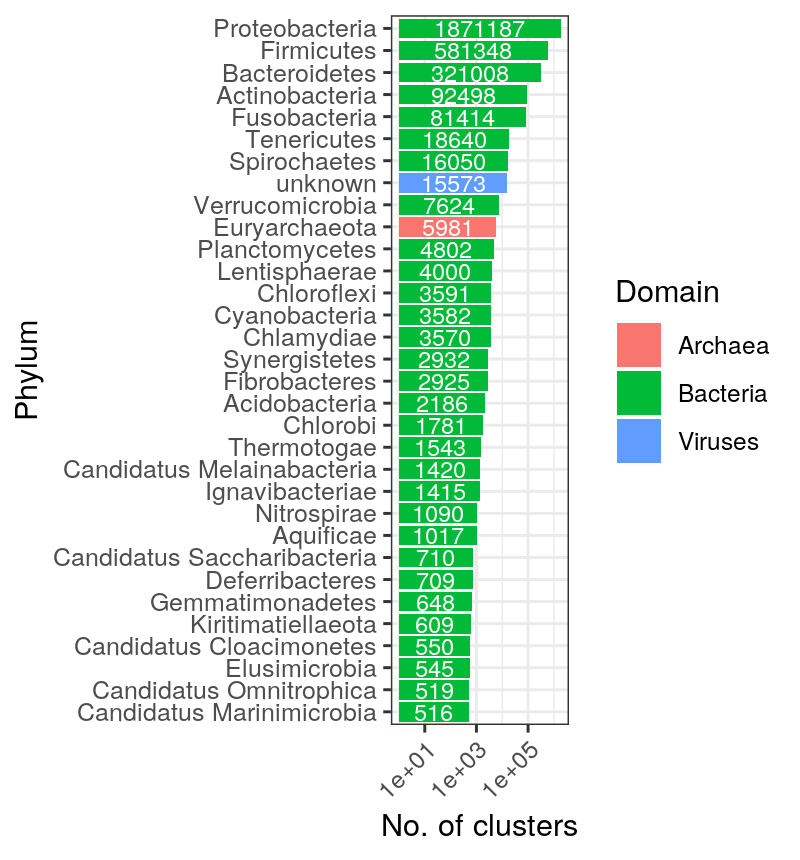

In [128]:
# plotting by phylum (w/ count cutoff)
p = tax_s %>%
    dt_filter(n >= 500) %>%
    dt_mutate(Phylum = reorder(Phylum, n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=sqrt(n), label=n), size=3, color='white') +
    scale_y_log10() +
    labs(y = 'No. of clusters') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9),
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(4,4.3)
plot(p)

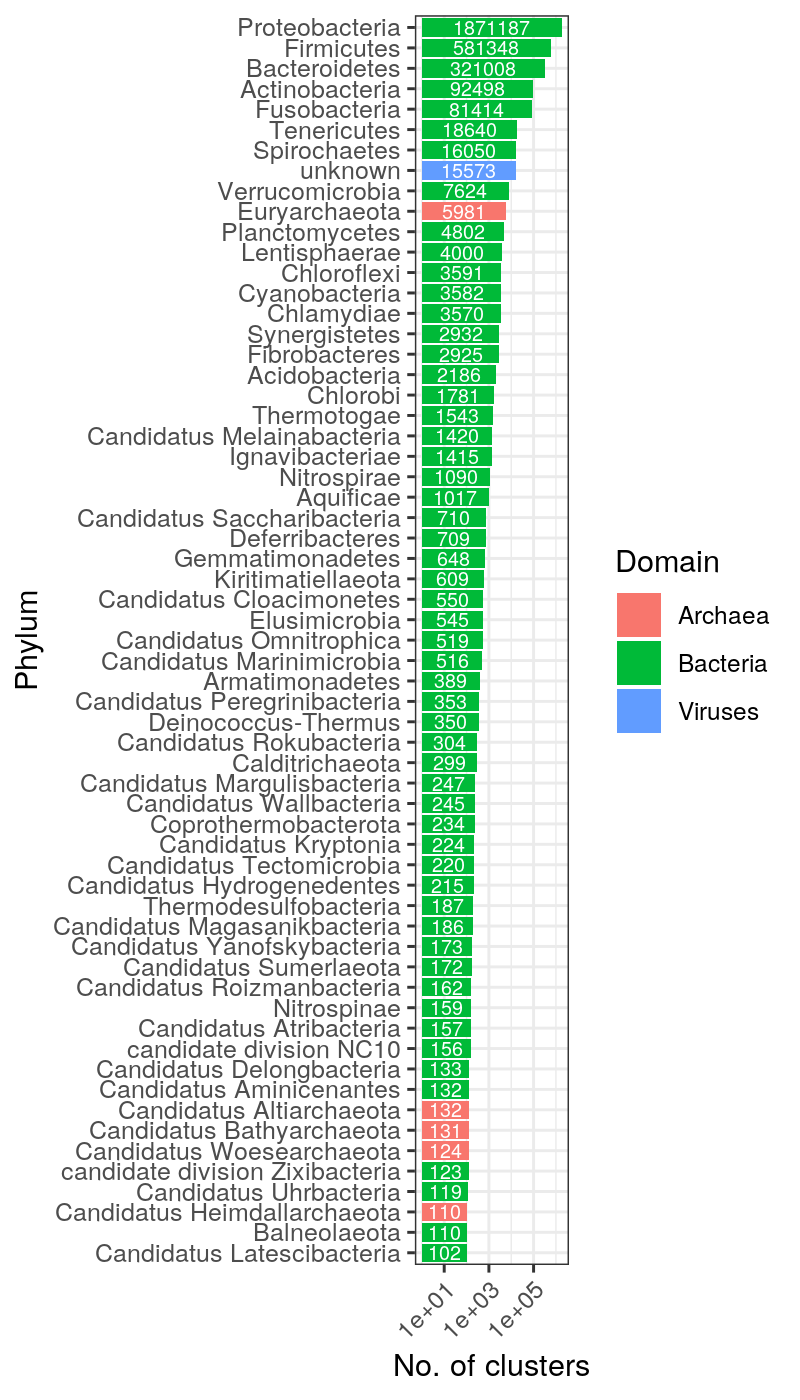

In [87]:
# plotting by phylum (w/ count cutoff)
p = tax_s %>%
    dt_filter(n >= 100) %>%
    dt_mutate(Phylum = reorder(Phylum, n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=sqrt(n), label=n), size=2.5, color='white') +
    scale_y_log10() +
    labs(y = 'No. of clusters') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9),
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(4,7)
plot(p)

In [28]:
# top phyla
df.dims(20)
tax_s %>% 
    dt_arrange(-n) %>%
    dt_slice_head(n=20)
df.dims()

Domain   Phylum          n      
1  Bacteria Proteobacteria  1871187
2  Bacteria Firmicutes       581348
3  Bacteria Bacteroidetes    321008
4  Bacteria Actinobacteria    92498
5  Bacteria Fusobacteria      81414
6  Bacteria Tenericutes       18640
7  Bacteria Spirochaetes      16050
8  Viruses  unknown           15573
9  Bacteria Verrucomicrobia    7624
10 Archaea  Euryarchaeota      5981
11 Bacteria Planctomycetes     4802
12 Bacteria Lentisphaerae      4000
13 Bacteria Chloroflexi        3591
14 Bacteria Cyanobacteria      3582
15 Bacteria Chlamydiae         3570
16 Bacteria Synergistetes      2932
17 Bacteria Fibrobacteres      2925
18 Bacteria Acidobacteria      2186
19 Bacteria Chlorobi           1781
20 Bacteria Thermotogae        1543

In [31]:
# summarizing taxonomy (by class)
tax_s = tax %>%
    dt_filter(Class != '') %>%
    dt_summarize(n = n_distinct(seqid), 
              by=list(Domain, Phylum, Class)) 
 
tax_s

Domain   Phylum                    Class                        n    
1   Bacteria Proteobacteria            Betaproteobacteria           36558
2   Bacteria Proteobacteria            Epsilonproteobacteria         6879
⋮   ⋮        ⋮                         ⋮                            ⋮    
267 Bacteria Gemmatimonadetes          uc_Gemmatimonadetes          1    
268 Archaea  Candidatus Woesearchaeota uc_Candidatus Woesearchaeota 1

In [32]:
# top hits
df.dims(20)
tax_s %>%
    dt_arrange(-n) %>%
    dt_slice_head(n=20)
df.dims()

Domain   Phylum         Class               n      
1  Bacteria Proteobacteria Gammaproteobacteria 1754067
2  Bacteria Firmicutes     Clostridia           348772
3  Bacteria Bacteroidetes  Bacteroidia          258070
4  Bacteria Firmicutes     Bacilli              170038
5  Bacteria Fusobacteria   Fusobacteriia         81414
6  Bacteria Actinobacteria Actinobacteria        72198
7  Bacteria Proteobacteria Betaproteobacteria    36558
8  Bacteria Proteobacteria Alphaproteobacteria   36513
9  Bacteria Firmicutes     unknown               29880
10 Bacteria Proteobacteria Deltaproteobacteria   26920
11 Bacteria Bacteroidetes  unknown               22023
12 Bacteria Actinobacteria Coriobacteriia        19118
13 Bacteria Bacteroidetes  Flavobacteriia        17607
14 Bacteria Firmicutes     Negativicutes         16426
15 Bacteria Tenericutes    Mollicutes            15955
16 Viruses  unknown        unknown               15573
17 Bacteria Spirochaetes   Spirochaetia          13681
18 Bacteria Firmicutes     Erysipelotrichia      10515
19 Bacteria Bacteroidetes  Cytophagia             9911
20 Bacteria Bacteroidetes  Sphingobacteriia       8061

In [79]:
# number of phyla
df.dims(20)
tax_s %>%
    dt_filter(n >= 100) %>%
    dt_distinct(Phylum, Domain) %>%
    dt_count(Domain)
df.dims()

Domain   N 
1 Bacteria 55
2 Archaea   5
3 Viruses   1

In [88]:
# number of phyla
df.dims(20)
tax_s %>%
    dt_filter(n >= 100,
              grepl('Candid', Phylum)) %>%
    dt_distinct(Phylum, Domain) %>%
    dt_count(Domain)
df.dims()

Domain   N 
1 Bacteria 21
2 Archaea   4

## COG

In [33]:
# eggnog-mapper v2
cols = c(
"query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"Predicted_taxonomic_group",
"Predicted_protein_name",
"Gene_Ontology_terms",
"EC_number",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
"tax_scope__eggNOG_taxonomic_level_used_for_annotation",
"eggNOG_OGs",
"bestOG",
"COG_Functional_Category",
"eggNOG_free_text_description"
)

In [34]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 10000', file=F, header=FALSE) 
COG_annot = fread(cmd=cmd, sep='\t') 
colnames(COG_annot) = cols
## separate
max_feats = COG_annot %>%
    dt_mutate(n_feats = stringr::str_length(COG_Functional_Category)) %>%
    dt_pull(n_feats) %>% max
cat('Max No. of features:', max_feats, '\n')
new_cols = gsub('^', 'X', 1:(max_feats))
COG_annot = COG_annot %>%
    dt_select(query_name, COG_Functional_Category) %>%
    dt_separate(COG_Functional_Category, into=new_cols, sep='') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='COG_cat') %>%
    dt_filter(!is.na(COG_cat)) %>%
    dt_select(-X) %>%
    dt_rename(seqid = query_name)
COG_annot 

Max No. of features: 5 


seqid                            COG_cat
1       6adc6c6b9ab644af811e14d8a5381fbf C      
2       186964524ed64aa9a1c5f88f4819c8a2 E      
⋮       ⋮                                ⋮      
3717561 2d94a00648f14a11aac5167a761130a0 Z      
3717562 379a71c7de62478db061c09cf413a4d6 Z

In [35]:
# Loading function group descriptions
COG_func_cat_file = '/ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/COG_cateogories.tsv'
COG_func_cat = fread(COG_func_cat_file, sep='\t') %>%
    dt_rename(COG_cat = COG_category)
COG_func_cat

COG_cat Functional_description                                    
1  D       Cell cycle control, cell division, chromosome partitioning
2  M       Cell wall/membrane/envelope biogenesis                    
⋮  ⋮       ⋮                                                         
24 R       General function prediction only                          
25 S       Function unknown                                          
   Functional_group                
1  Cellular processes and signaling
2  Cellular processes and signaling
⋮  ⋮                               
24 Poorly characterized            
25 Poorly characterized

In [36]:
# checking key overlap
overlap(COG_annot %>% dt_distinct(COG_cat) %>% dt_pull(COG_cat),
        COG_func_cat %>% dt_distinct(COG_cat) %>% dt_pull(COG_cat))

intersect(x,y): 24 
setdiff(x,y): 0 
setdiff(y,x): 1 
union(x,y): 25 


In [37]:
# joining
COG_annot = COG_annot %>%
    dt_left_join(COG_func_cat, c('COG_cat'))
COG_annot

seqid                            COG_cat
1       6adc6c6b9ab644af811e14d8a5381fbf C      
2       186964524ed64aa9a1c5f88f4819c8a2 E      
⋮       ⋮                                ⋮      
3717561 2d94a00648f14a11aac5167a761130a0 Z      
3717562 379a71c7de62478db061c09cf413a4d6 Z      
        Functional_description              Functional_group                
1       Energy production and conversion    Metabolism                      
2       Amino acid transport and metabolism Metabolism                      
⋮       ⋮                                   ⋮                               
3717561 Cytoskeleton                        Cellular processes and signaling
3717562 Cytoskeleton                        Cellular processes and signaling

#### Adding taxonomy

In [38]:
# checking key overlap
overlap(COG_annot %>% dt_distinct(seqid) %>% dt_pull(seqid),
        tax %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 2728239 
setdiff(x,y): 711884 
setdiff(y,x): 331763 
union(x,y): 3771886 


In [39]:
# adding taxonomy info
COG_annot = COG_annot %>%
    dt_inner_join(tax, by=c('seqid')) 

COG_annot

seqid                            COG_cat
1       4f509c5351da4782bcba565a798e69da S      
2       07de412a5c5743c7aec282ab947ff2a7 L      
⋮       ⋮                                ⋮      
2969993 ef6182b9f00f44fb83c5c5d9af931f5e H      
2969994 2497ac9df6f64aa9bcfea20fd97f7dcc M      
        Functional_description                
1       Function unknown                      
2       Replication, recombination and repair 
⋮       ⋮                                     
2969993 Coenzyme transport and metabolism     
2969994 Cell wall/membrane/envelope biogenesis
        Functional_group                   Domain   Kingdom Phylum        
1       Poorly characterized               Bacteria unknown Proteobacteria
2       Information storage and processing Bacteria unknown Proteobacteria
⋮       ⋮                                  ⋮        ⋮       ⋮             
2969993 Metabolism                         Bacteria unknown Proteobacteria
2969994 Cellular processes and signaling   Bacteria unknown Firmicutes    
        Class                 Order             Family            
1       Betaproteobacteria    Neisseriales      Chromobacteriaceae
2       Epsilonproteobacteria Campylobacterales Helicobacteraceae 
⋮       ⋮                     ⋮                 ⋮                 
2969993 Gammaproteobacteria   Vibrionales       Vibrionaceae      
2969994 Clostridia            Clostridiales     Lachnospiraceae   
        Genus              Species                        
1       Microvirgula       Microvirgula aerodenitrificans 
2       Helicobacter       Helicobacter hepaticus         
⋮       ⋮                  ⋮                              
2969993 Paraphotobacterium Paraphotobacterium marinum     
2969994 Oribacterium       Oribacterium sp. oral taxon 078

In [40]:
COG_annot %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length %>%
    cat('Number of rep seqs with COG annotations:', ., '\n')

Number of rep seqs with COG annotations: 2728239 


### Sum by COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [41]:
# summarizing
total_clusts = COG_annot %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

COG_annot_s = COG_annot %>%
    dt_distinct(seqid, COG_cat, Functional_group) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(COG_cat, Functional_group)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100)

COG_annot_s

COG_cat Functional_group                   N      perc_abund
1  S       Poorly characterized               400826 14.69175  
2  L       Information storage and processing 287090 10.52291  
⋮  ⋮       ⋮                                  ⋮      ⋮         
22 Z       Cellular processes and signaling   8728   0.31991332
23 A       Information storage and processing  707   0.02591415

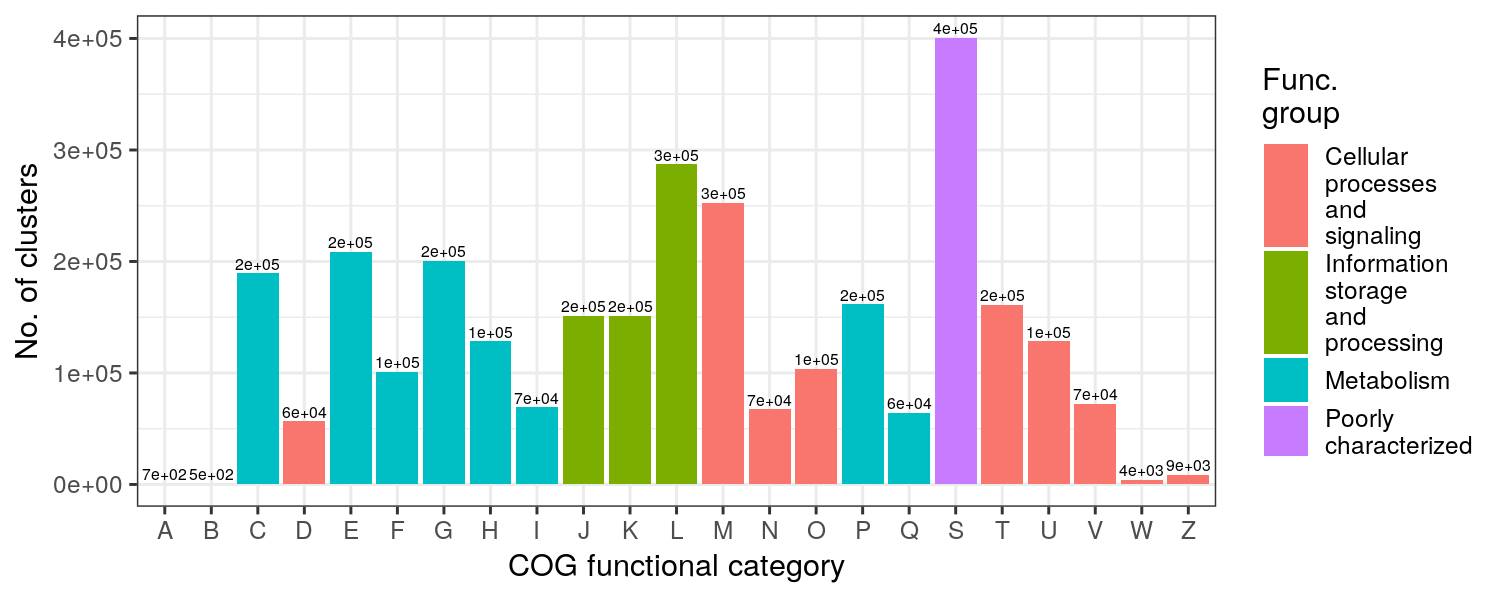

In [42]:
# plotting summary
p = COG_annot_s %>%
    dt_mutate(Functional_group = stringr::str_wrap(Functional_group, 10)) %>%
    ggplot(aes(COG_cat, N, fill=Functional_group)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=formatC(N, format='e', digits=0)), vjust=-0.3, size=2) +
    scale_fill_discrete('Func.\ngroup') +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw()

p.dims(7.5,3)
plot(p)

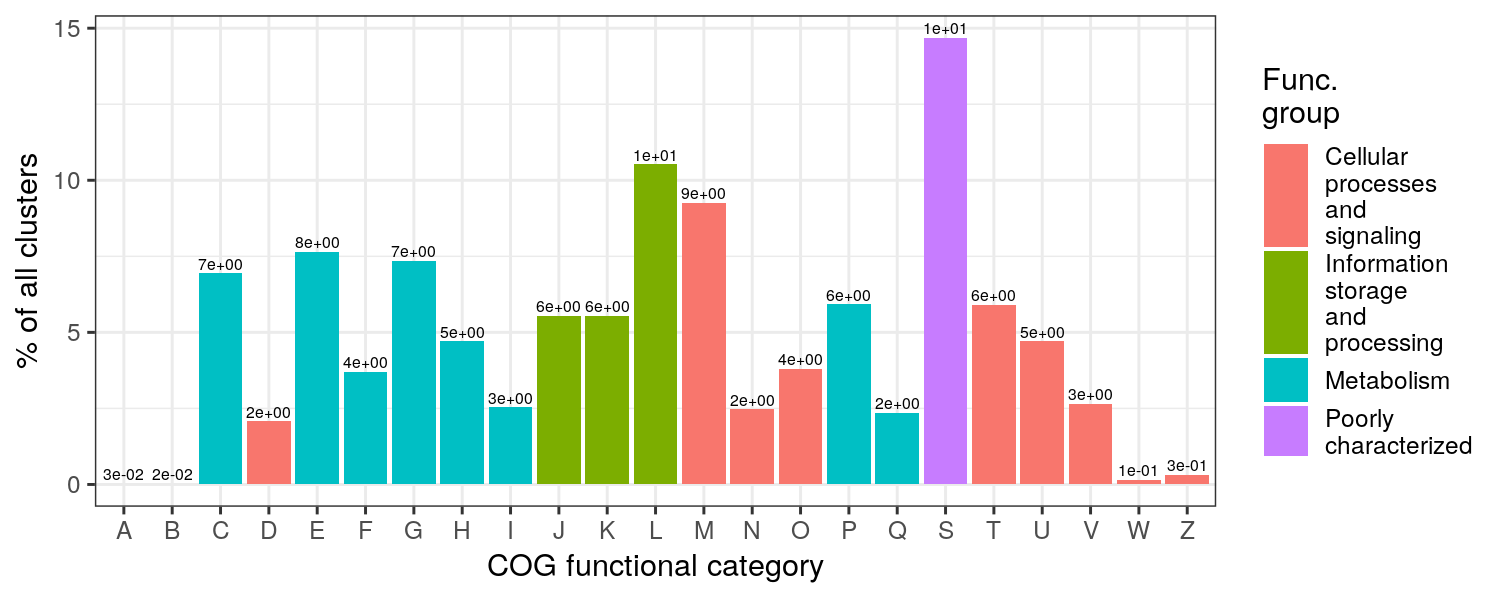

In [43]:
# plotting summary (%)
p = COG_annot_s %>%
    dt_mutate(Functional_group = stringr::str_wrap(Functional_group, 10)) %>%
    ggplot(aes(COG_cat, perc_abund, fill=Functional_group)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=formatC(perc_abund, format='e', digits=0)), vjust=-0.3, size=2) +
    scale_fill_discrete('Func.\ngroup') +
    labs(x='COG functional category', y='% of all clusters') +
    theme_bw()

p.dims(7.5,3)
plot(p)

#### Grouped by taxonomy

In [44]:
# summarizing
COG_annot_s = COG_annot %>%
    dt_distinct(seqid, COG_cat, Functional_group, Domain, Phylum) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(COG_cat, Functional_group, Domain, Phylum)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum))

COG_annot_s

COG_cat Functional_group                   Domain  
1    S       Poorly characterized               Bacteria
2    L       Information storage and processing Bacteria
⋮    ⋮       ⋮                                  ⋮       
1593 J       Information storage and processing Archaea 
1594 P       Metabolism                         Bacteria
     Phylum                  N      perc_abund   n_per_phylum
1    Proteobacteria          227555 8.340728     1896970     
2    Proteobacteria          168485 6.175595     1896970     
⋮    ⋮                       ⋮      ⋮            ⋮           
1593 Crenarchaeota           1      3.665368e-05 47          
1594 Candidatus Azambacteria 1      3.665368e-05 10

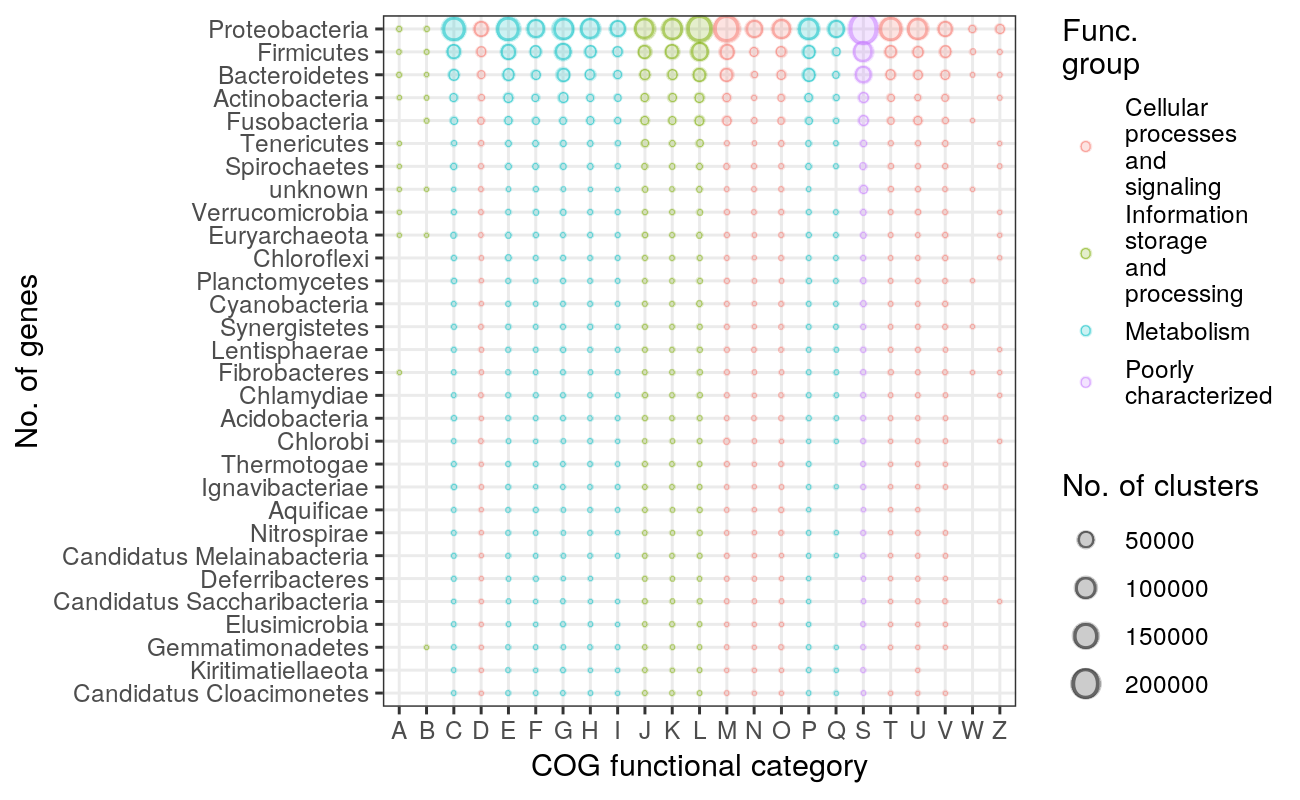

In [45]:
# plotting summary by domain
p = COG_annot_s %>%
    dt_filter(n_per_phylum >= 500) %>%
    dt_mutate(Functional_group = stringr::str_wrap(Functional_group, 10),
              Phylum = reorder(Phylum, n_per_phylum)) %>%
    ggplot(aes(COG_cat, Phylum, size=N, color=Functional_group)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_color_discrete('Func.\ngroup') +
    scale_size_continuous('No. of clusters', range=c(0.5, 5)) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

p.dims(6.5,4)
plot(p)

##### Just bacteria

In [46]:
# summarizing
COG_annot_s = COG_annot %>%
    dt_distinct(seqid, COG_cat, Functional_group, Domain, Phylum) %>%
    dt_filter(Domain == 'Bacteria') %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(COG_cat, Functional_group, Domain, Phylum)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum))

COG_annot_s

COG_cat Functional_group                   Domain  
1    S       Poorly characterized               Bacteria
2    L       Information storage and processing Bacteria
⋮    ⋮       ⋮                                  ⋮       
1430 D       Cellular processes and signaling   Bacteria
1431 P       Metabolism                         Bacteria
     Phylum                   N      perc_abund   n_per_phylum
1    Proteobacteria           227555 8.340728     1896970     
2    Proteobacteria           168485 6.175595     1896970     
⋮    ⋮                        ⋮      ⋮            ⋮           
1430 Candidatus Wirthbacteria 1      3.665368e-05  4          
1431 Candidatus Azambacteria  1      3.665368e-05 10

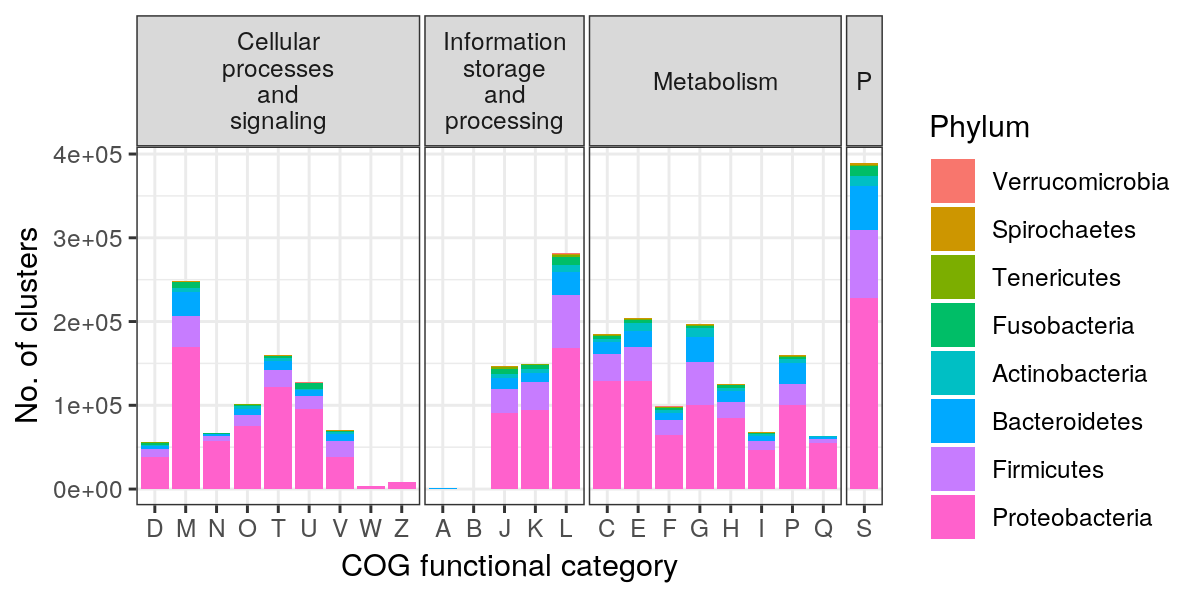

In [47]:
# plotting summary by domain
p = COG_annot_s %>%
    dt_filter(n_per_phylum >= 5000) %>%
    dt_mutate(Functional_group = ifelse(Functional_group == 'Poorly characterized',
                                        'P', Functional_group),
              Functional_group = stringr::str_wrap(Functional_group, 10),
              Phylum = reorder(Phylum, n_per_phylum)) %>%
    ggplot(aes(COG_cat, N, fill=Phylum)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Phylum') +
    facet_grid(. ~ Functional_group, scales='free_x', space='free_x') +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw() +
    theme(
      panel.spacing = unit(0.1, "lines")
    )

p.dims(6,3)
plot(p)

##### Just archaea

In [48]:
# summarizing
COG_annot_s = COG_annot %>%
    dt_distinct(seqid, COG_cat, Functional_group, Domain, Phylum) %>%
    dt_filter(Domain == 'Archaea') %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(COG_cat, Functional_group, Domain, Phylum)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum))

COG_annot_s

COG_cat Functional_group                   Domain  Phylum                  
1   S       Poorly characterized               Archaea Euryarchaeota           
2   F       Metabolism                         Archaea Euryarchaeota           
⋮   ⋮       ⋮                                  ⋮       ⋮                       
141 H       Metabolism                         Archaea Candidatus Micrarchaeota
142 J       Information storage and processing Archaea Crenarchaeota           
    N   perc_abund   n_per_phylum
1   752 0.02756357   5534        
2   355 0.01301206   5534        
⋮   ⋮   ⋮            ⋮           
141 2   7.330736e-05 29          
142 1   3.665368e-05 47

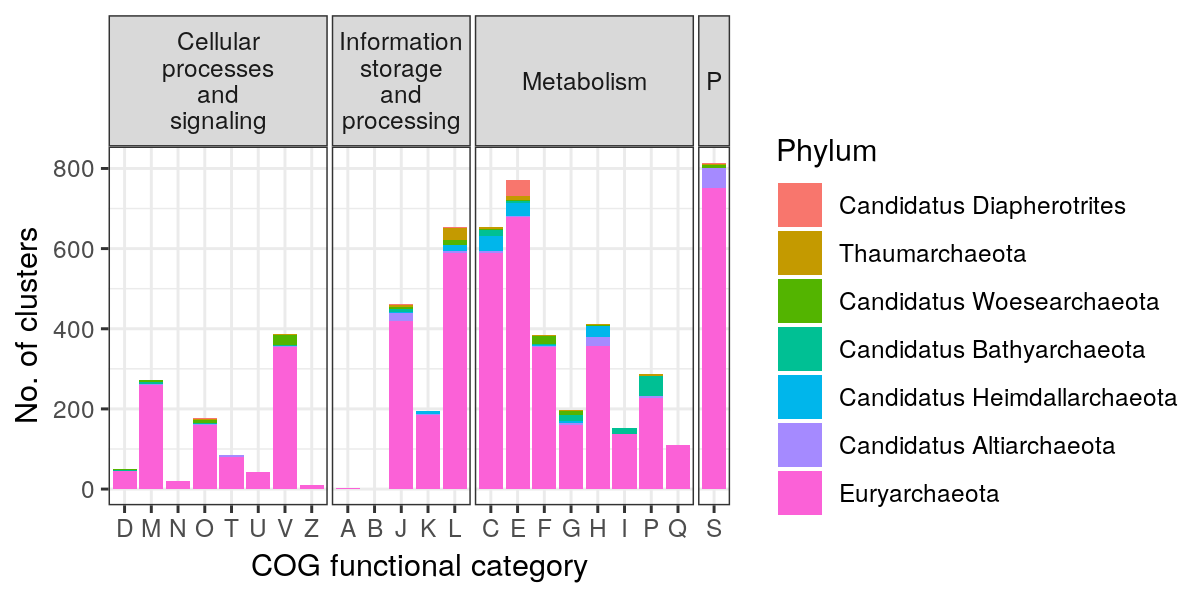

In [49]:
# plotting summary by domain
p = COG_annot_s %>%
    dt_filter(n_per_phylum >= 50) %>%
    dt_mutate(Functional_group = ifelse(Functional_group == 'Poorly characterized',
                                        'P', Functional_group),
              Functional_group = stringr::str_wrap(Functional_group, 10),
              Phylum = reorder(Phylum, n_per_phylum)) %>%
    ggplot(aes(COG_cat, N, fill=Phylum)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Phylum') +
    facet_grid(. ~ Functional_group, scales='free_x', space='free_x') +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw() +
    theme(
      panel.spacing = unit(0.1, "lines")
    )

p.dims(6,3)
plot(p)

##### Just viruses

In [69]:
# summarizing
COG_annot_s = COG_annot %>%
    dt_distinct(seqid, COG_cat, Functional_group, Domain, Phylum) %>%
    dt_filter(Domain == 'Viruses') %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(COG_cat, Functional_group, Domain, Phylum)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum))

COG_annot_s

COG_cat Functional_group                   Domain  Phylum  N    perc_abund  
1  S       Poorly characterized               Viruses unknown 5406 0.19814980  
2  L       Information storage and processing Viruses unknown  628 0.02301851  
⋮  ⋮       ⋮                                  ⋮       ⋮       ⋮    ⋮           
20 A       Information storage and processing Viruses unknown 2    7.330736e-05
21 B       Information storage and processing Viruses unknown 1    3.665368e-05
   n_per_phylum
1  8171        
2  8171        
⋮  ⋮           
20 8171        
21 8171

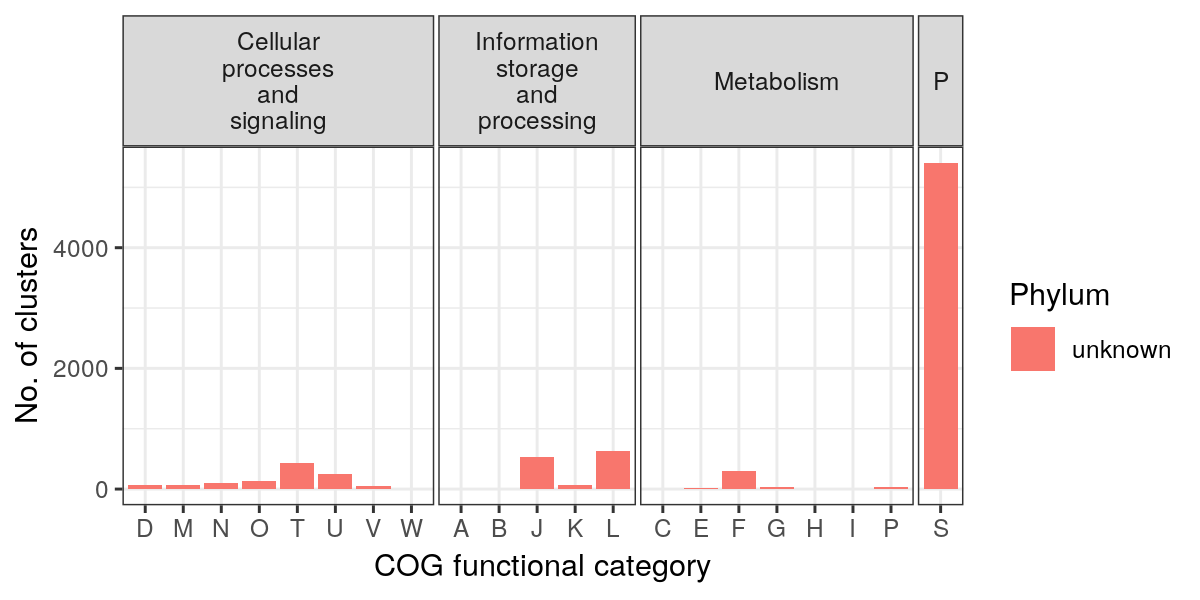

In [70]:
# plotting summary by domain
p = COG_annot_s %>%
    dt_filter(n_per_phylum >= 50) %>%
    dt_mutate(Functional_group = ifelse(Functional_group == 'Poorly characterized',
                                        'P', Functional_group),
              Functional_group = stringr::str_wrap(Functional_group, 10),
              Phylum = reorder(Phylum, n_per_phylum)) %>%
    ggplot(aes(COG_cat, N, fill=Phylum)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Phylum') +
    facet_grid(. ~ Functional_group, scales='free_x', space='free_x') +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw() +
    theme(
      panel.spacing = unit(0.1, "lines")
    )

p.dims(6,3)
plot(p)

### KEGG pathway

In [50]:
# KEGG pathways
## Reading file
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 100000', file=F, header=FALSE) 
KEGG_ptw = fread(cmd=cmd, sep='\t') 
colnames(KEGG_ptw) = cols
## Formatting
KEGG_ptw = KEGG_ptw %>%
    dt_select(query_name, KEGG_Pathway) %>%
    dt_mutate(KEGG_Pathway = gsub(',map.+', '', KEGG_Pathway))
## Max pathways per seqid 
max_feats = KEGG_ptw %>%
    dt_mutate(n_feats = stringr::str_count(KEGG_Pathway, ',')) %>%
    dt_pull(n_feats) %>% max
cat('Max pathways per record:', max_feats, '\n')
new_cols = gsub('^', 'X', 1:(max_feats+1))
## separating 
KEGG_Pathway = KEGG_ptw %>%
    dt_separate(KEGG_Pathway, into=new_cols, sep=',') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='KEGG_pathway') %>%
    dt_select(-X) %>%
    dt_filter(!is.na(KEGG_pathway),
              !grepl('^map', KEGG_pathway)) 
KEGG_Pathway

Max pathways per record: 103 


query_name                       KEGG_pathway
1       6adc6c6b9ab644af811e14d8a5381fbf ko00020     
2       fee92ba1bb764d09a608d84b377a7a21 ko02010     
⋮       ⋮                                ⋮           
5530276 999fde638aad466982963a1d580d4cd6 ko05231     
5530277 e2e3b25725e144d0b8887d5f0bce650c ko05231

In [51]:
# using kegg ptwy mapping file from humann2 to get pathway hierarchies
ptwy_map_file = '/ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/map_kegg-pwy_name_cat.txt.gz'
cmd = glue::glue('gunzip -c {file}', file=ptwy_map_file)
ptwy_map = fread(cmd=cmd, sep='\t', header=FALSE)
colnames(ptwy_map) = c('KEGG_pathway', 'Level1', 'Level2', 'KEGG_Pathway_Name')
ptwy_map 

KEGG_pathway Level1           Level2                       
1   ko01100      Metabolism       Global and overview maps     
2   ko01110      Metabolism       Global and overview maps     
⋮   ⋮            ⋮                ⋮                            
535 ko07114      Drug Development Skeleton-based classification
536 ko07117      Drug Development Skeleton-based classification
    KEGG_Pathway_Name                    
1   Metabolic pathways Major             
2   Biosynthesis of secondary metabolites
⋮   ⋮                                    
535 Naphthalene family                   
536 Benzodiazepine family

In [52]:
# joining
KEGG_Pathway = KEGG_Pathway %>%
    dt_left_join(ptwy_map, by=c('KEGG_pathway')) %>%
    dt_rename(seqid = query_name) %>%
    dt_filter(!is.na(KEGG_Pathway_Name),
              KEGG_Pathway_Name != '')
KEGG_Pathway

seqid                            KEGG_pathway
1       6adc6c6b9ab644af811e14d8a5381fbf ko00020     
2       fee92ba1bb764d09a608d84b377a7a21 ko02010     
⋮       ⋮                                ⋮           
5530276 999fde638aad466982963a1d580d4cd6 ko05231     
5530277 e2e3b25725e144d0b8887d5f0bce650c ko05231     
        Level1                               Level2                 
1       Metabolism                           Carbohydrate metabolism
2       Environmental Information Processing Membrane transport     
⋮       ⋮                                    ⋮                      
5530276 Human Diseases                       Cancer: overview       
5530277 Human Diseases                       Cancer: overview       
        KEGG_Pathway_Name           
1       Citrate cycle (TCA cycle)   
2       ABC transporters            
⋮       ⋮                           
5530276 Choline metabolism in cancer
5530277 Choline metabolism in cancer

In [53]:
# joining with taxonomy
KEGG_Pathway = KEGG_Pathway %>%
    dt_inner_join(tax, by=c('seqid'))
KEGG_Pathway

seqid                            KEGG_pathway Level1    
1       51e9bda849cb4ddb8a65a16c01b22a92 ko00630      Metabolism
2       51e9bda849cb4ddb8a65a16c01b22a92 ko00680      Metabolism
⋮       ⋮                                ⋮            ⋮         
4509809 2497ac9df6f64aa9bcfea20fd97f7dcc ko00523      Metabolism
4509810 2497ac9df6f64aa9bcfea20fd97f7dcc ko01130      Metabolism
        Level2                                  
1       Carbohydrate metabolism                 
2       Energy metabolism                       
⋮       ⋮                                       
4509809 Metabolism of terpenoids and polyketides
4509810 Global and overview maps                
        KEGG_Pathway_Name                       Domain   Kingdom Phylum        
1       Glyoxylate and dicarboxylate metabolism Bacteria unknown Proteobacteria
2       Methane metabolism                      Bacteria unknown Proteobacteria
⋮       ⋮                                       ⋮        ⋮       ⋮             
4509809 Polyketide sugar unit biosynthesis      Bacteria unknown Firmicutes    
4509810 Biosynthesis of antibiotics             Bacteria unknown Firmicutes    
        Class               Order         Family          Genus         
1       Gammaproteobacteria Vibrionales   Vibrionaceae    Photobacterium
2       Gammaproteobacteria Vibrionales   Vibrionaceae    Photobacterium
⋮       ⋮                   ⋮             ⋮               ⋮             
4509809 Clostridia          Clostridiales Lachnospiraceae Oribacterium  
4509810 Clostridia          Clostridiales Lachnospiraceae Oribacterium  
        Species                        
1       Photobacterium damselae        
2       Photobacterium damselae        
⋮       ⋮                              
4509809 Oribacterium sp. oral taxon 078
4509810 Oribacterium sp. oral taxon 078

In [54]:
# summary of clusters with annotation
KEGG_Pathway %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length %>%
    cat('No of clusters with KEGG pathway:', ., '\n')

No of clusters with KEGG pathway: 1316729 


In [55]:
# summarizing
KEGG_Pathway_s = KEGG_Pathway %>%
    dt_summarize(n = n_distinct(seqid), 
                 by=list(Level1, Level2, KEGG_Pathway_Name)) %>%
    dt_filter(Level2 != 'Global and overview maps') 

KEGG_Pathway_s

Level1                         Level2                                     
1   Metabolism                     Carbohydrate metabolism                    
2   Metabolism                     Energy metabolism                          
⋮   ⋮                              ⋮                                          
393 Metabolism                     Biosynthesis of other secondary metabolites
394 Genetic Information Processing Folding, sorting and degradation           
    KEGG_Pathway_Name                         n    
1   Glyoxylate and dicarboxylate metabolism   36999
2   Methane metabolism                        36576
⋮   ⋮                                         ⋮    
393 Clavulanic acid biosynthesis              1    
394 SNARE interactions in vesicular transport 1

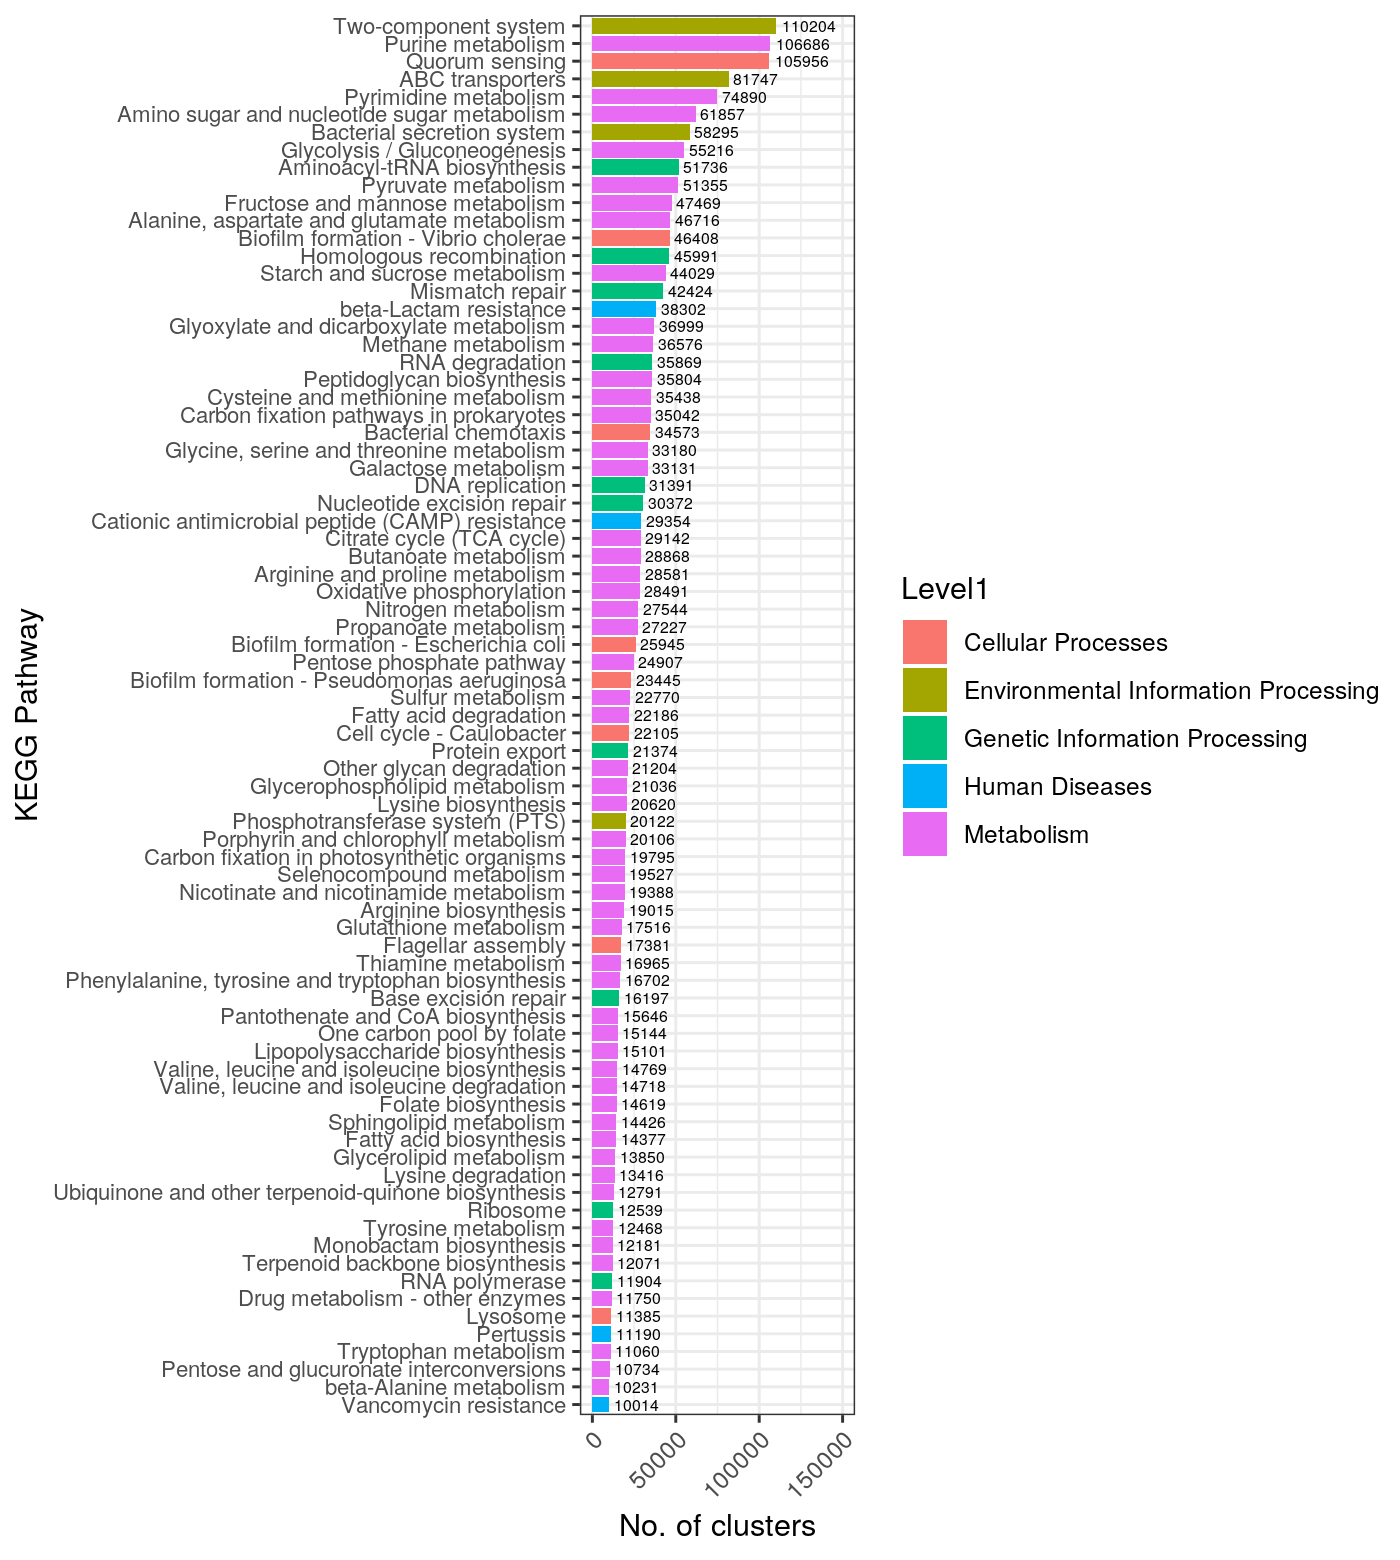

In [56]:
# plotting summary
p = KEGG_Pathway_s %>%
    dt_filter(n >= 10000) %>%
    dt_mutate(KEGG_Pathway_Name = reorder(KEGG_Pathway_Name, n)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level1)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=n), hjust=-0.1, size=2) +
    scale_y_continuous(limits=c(0, 150000)) +
    labs(x='KEGG Pathway', y='No. of clusters') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(7,7.8)
plot(p)

##### By taxonomy

In [90]:
# summarizing
KEGG_Pathway_s = KEGG_Pathway %>%
    dt_filter(!is.na(KEGG_Pathway_Name),
              KEGG_Pathway_Name != '') %>%
    dt_summarize(n = n_distinct(seqid), 
                 by=list(Level1, Level2, Domain, Phylum)) %>%
    dt_filter(Level2 != 'Global and overview maps') %>%
    dt_mutate(n_clust_phylum = sum(n), 
              by=list(Domain, Phylum))  %>%
    dt_mutate(n_clust_pathway = sum(n),
              by=list(Level2))

KEGG_Pathway_s

Level1             Level2                         Domain  
1    Metabolism         Carbohydrate metabolism        Bacteria
2    Metabolism         Energy metabolism              Bacteria
⋮    ⋮                  ⋮                              ⋮       
2122 Human Diseases     Drug resistance: antimicrobial Archaea 
2123 Cellular Processes Cell growth and death          Archaea 
     Phylum                    n      n_clust_phylum n_clust_pathway
1    Proteobacteria            174151 1505117        284668         
2    Proteobacteria             92978 1505117        142389         
⋮    ⋮                         ⋮      ⋮              ⋮              
2122 Candidatus Bathyarchaeota 1      251            63976          
2123 Candidatus Bathyarchaeota 1      251            38901

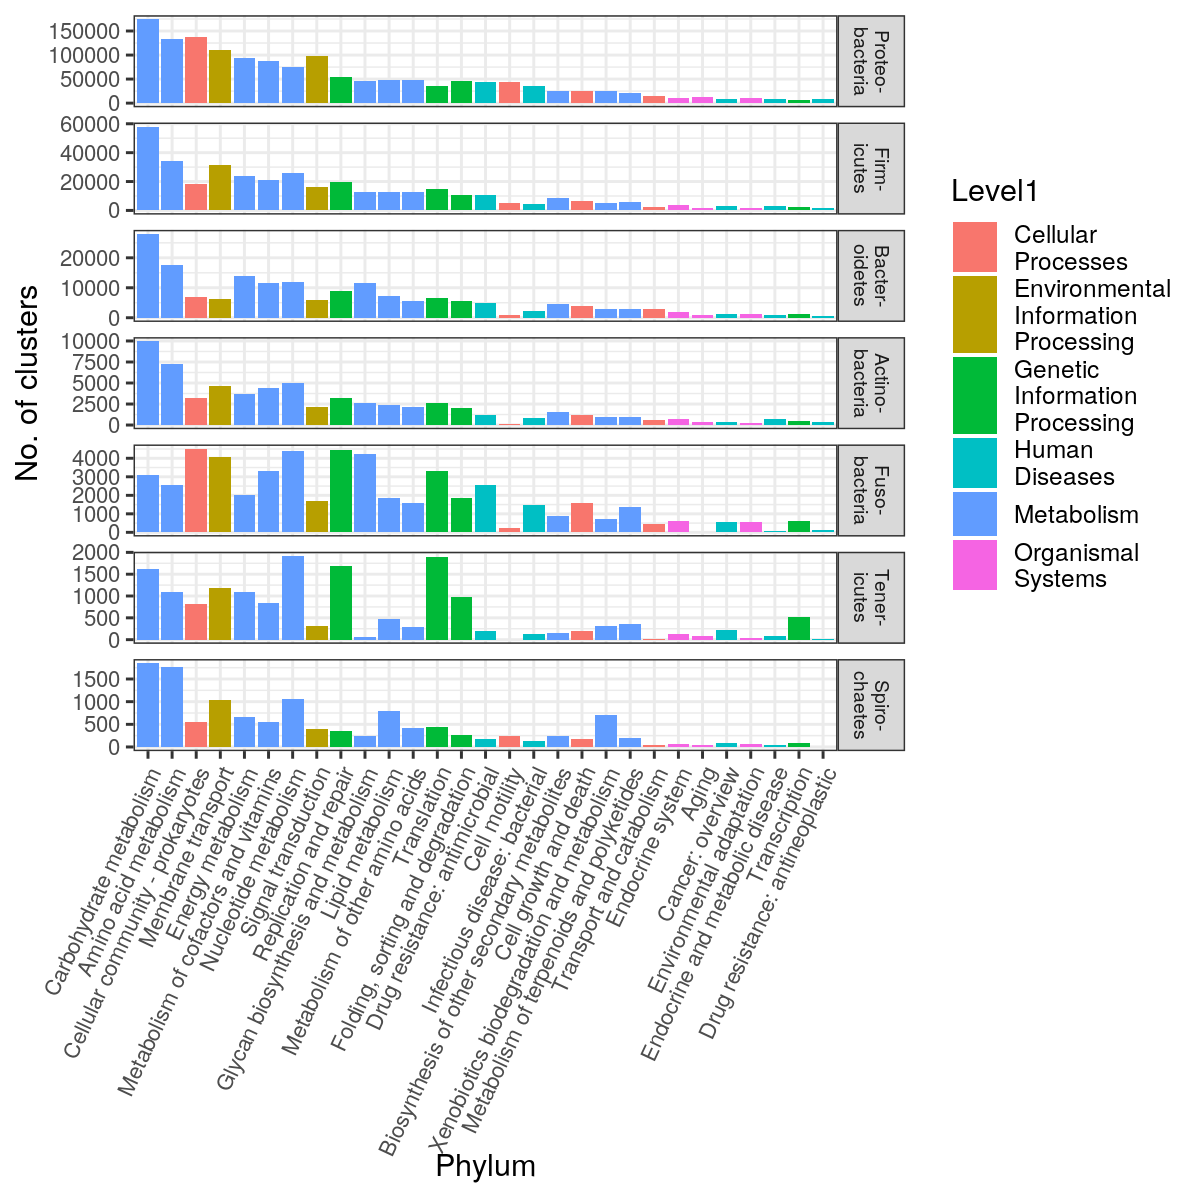

In [127]:
# plotting
p = KEGG_Pathway_s %>%
    dt_filter(n_clust_phylum >= 5000,
              n_clust_pathway >= 10000) %>%
    dt_mutate(Phylum = gsub('(bacteria|icutes)', '-\n\\1', Phylum),
              Phylum = gsub('(Spiro|Bacter)', '\\1-\n', Phylum),
              Level1 = stringr::str_wrap(Level1, 12),
              Phylum = reorder(Phylum, -n_clust_phylum),
              Level2 = reorder(Level2, -n_clust_pathway)) %>%
    ggplot(aes(Level2, n, fill=Level1)) +
    geom_bar(stat='identity') +
    labs(x='Phylum', y='No. of clusters') +
    facet_grid(Phylum ~ ., scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1, size=8),
        axis.text.y = element_text(size=8),
        strip.text.y = element_text(size=7)
    ) 

p.dims(6,6)
plot(p)

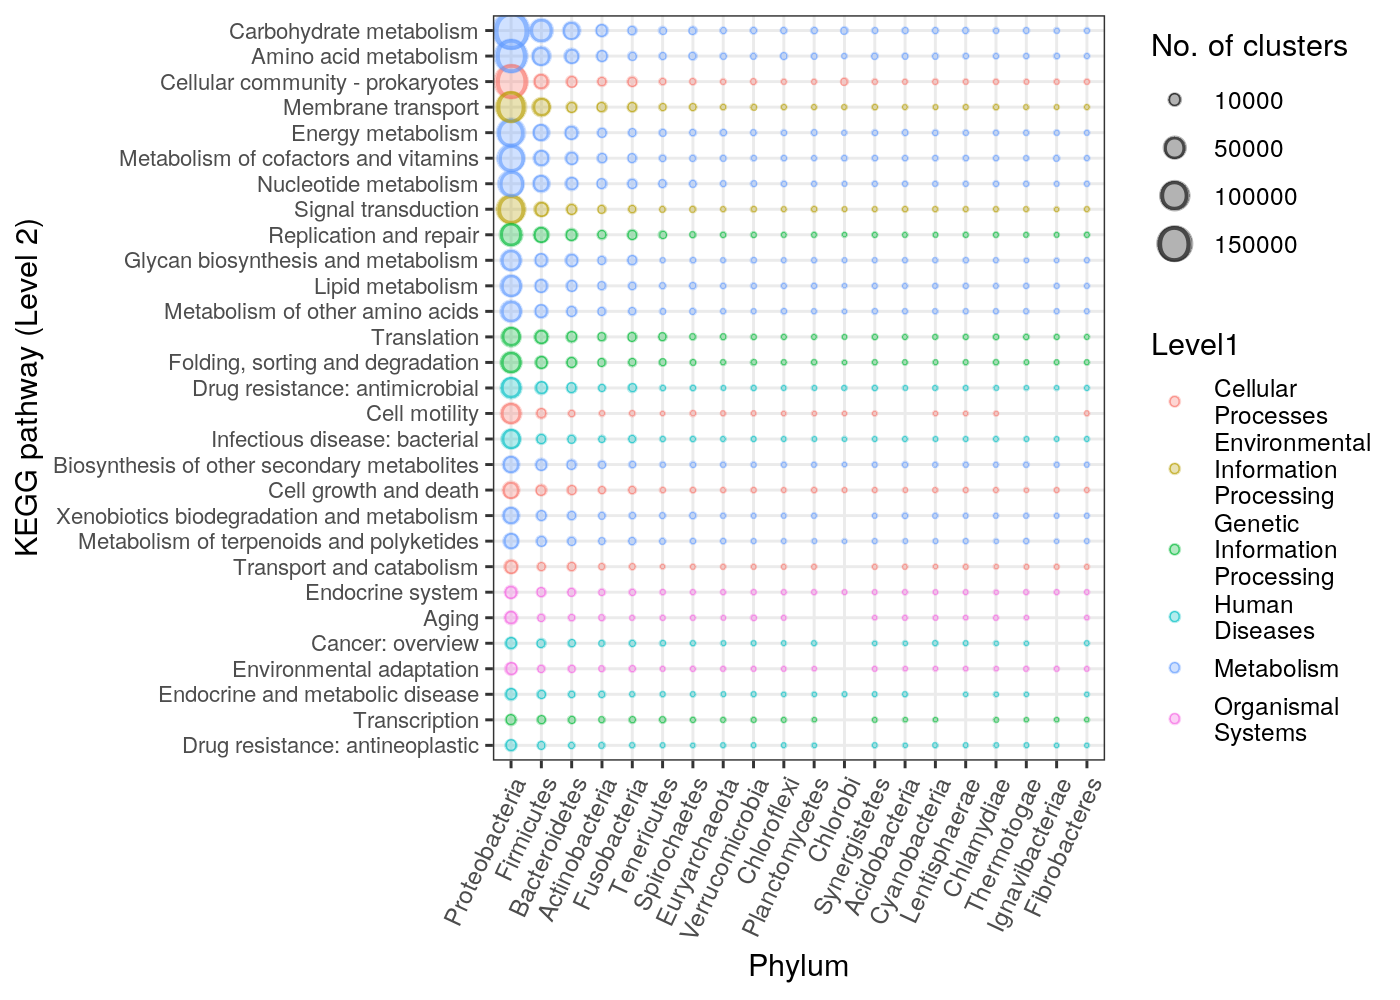

In [102]:
# plotting
p = KEGG_Pathway_s %>%
    dt_filter(n_clust_phylum >= 1000,
              n_clust_pathway >= 10000) %>%
    dt_mutate(Level1 = stringr::str_wrap(Level1, 12),
              Phylum = reorder(Phylum, -n_clust_phylum),
              Level2 = reorder(Level2, n_clust_pathway)) %>%
    ggplot(aes(Phylum, Level2, size=n, color=Level1)) +
    geom_point(alpha=0.3) +
    geom_point(shape='O', alpha=0.6) +
    scale_size_continuous('No. of clusters', 
                          breaks=c(10000, 50000, 100000, 150000),
                          range=c(0.5, 6)) +
    labs(x='Phylum', y='KEGG pathway (Level 2)') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1),
        axis.text.y = element_text(size=8)
    ) 

p.dims(7,5)
plot(p)

In [57]:
# summarizing
KEGG_Pathway_s = KEGG_Pathway %>%
    dt_filter(!is.na(KEGG_Pathway_Name),
              KEGG_Pathway_Name != '') %>%
    dt_summarize(n = n_distinct(seqid), 
                 by=list(Level1, Level2, KEGG_Pathway_Name, 
                         Domain, Phylum)) %>%
    dt_filter(Level2 != 'Global and overview maps') %>%
    dt_mutate(n_clust_phylum = sum(n), 
              by=list(Domain, Phylum))  %>%
    dt_mutate(n_clust_pathway = sum(n),
              by=list(KEGG_Pathway_Name))

KEGG_Pathway_s

Level1     Level2                  KEGG_Pathway_Name                      
1    Metabolism Carbohydrate metabolism Glyoxylate and dicarboxylate metabolism
2    Metabolism Energy metabolism       Methane metabolism                     
⋮    ⋮          ⋮                       ⋮                                      
6761 Metabolism Lipid metabolism        Primary bile acid biosynthesis         
6762 Metabolism Lipid metabolism        Secondary bile acid biosynthesis       
     Domain   Phylum         n     n_clust_phylum n_clust_pathway
1    Bacteria Proteobacteria 25533 1890761        36999          
2    Bacteria Proteobacteria 24446 1890761        36576          
⋮    ⋮        ⋮              ⋮     ⋮              ⋮              
6761 Bacteria Synergistetes  1     3271           683            
6762 Bacteria Synergistetes  1     3271           677

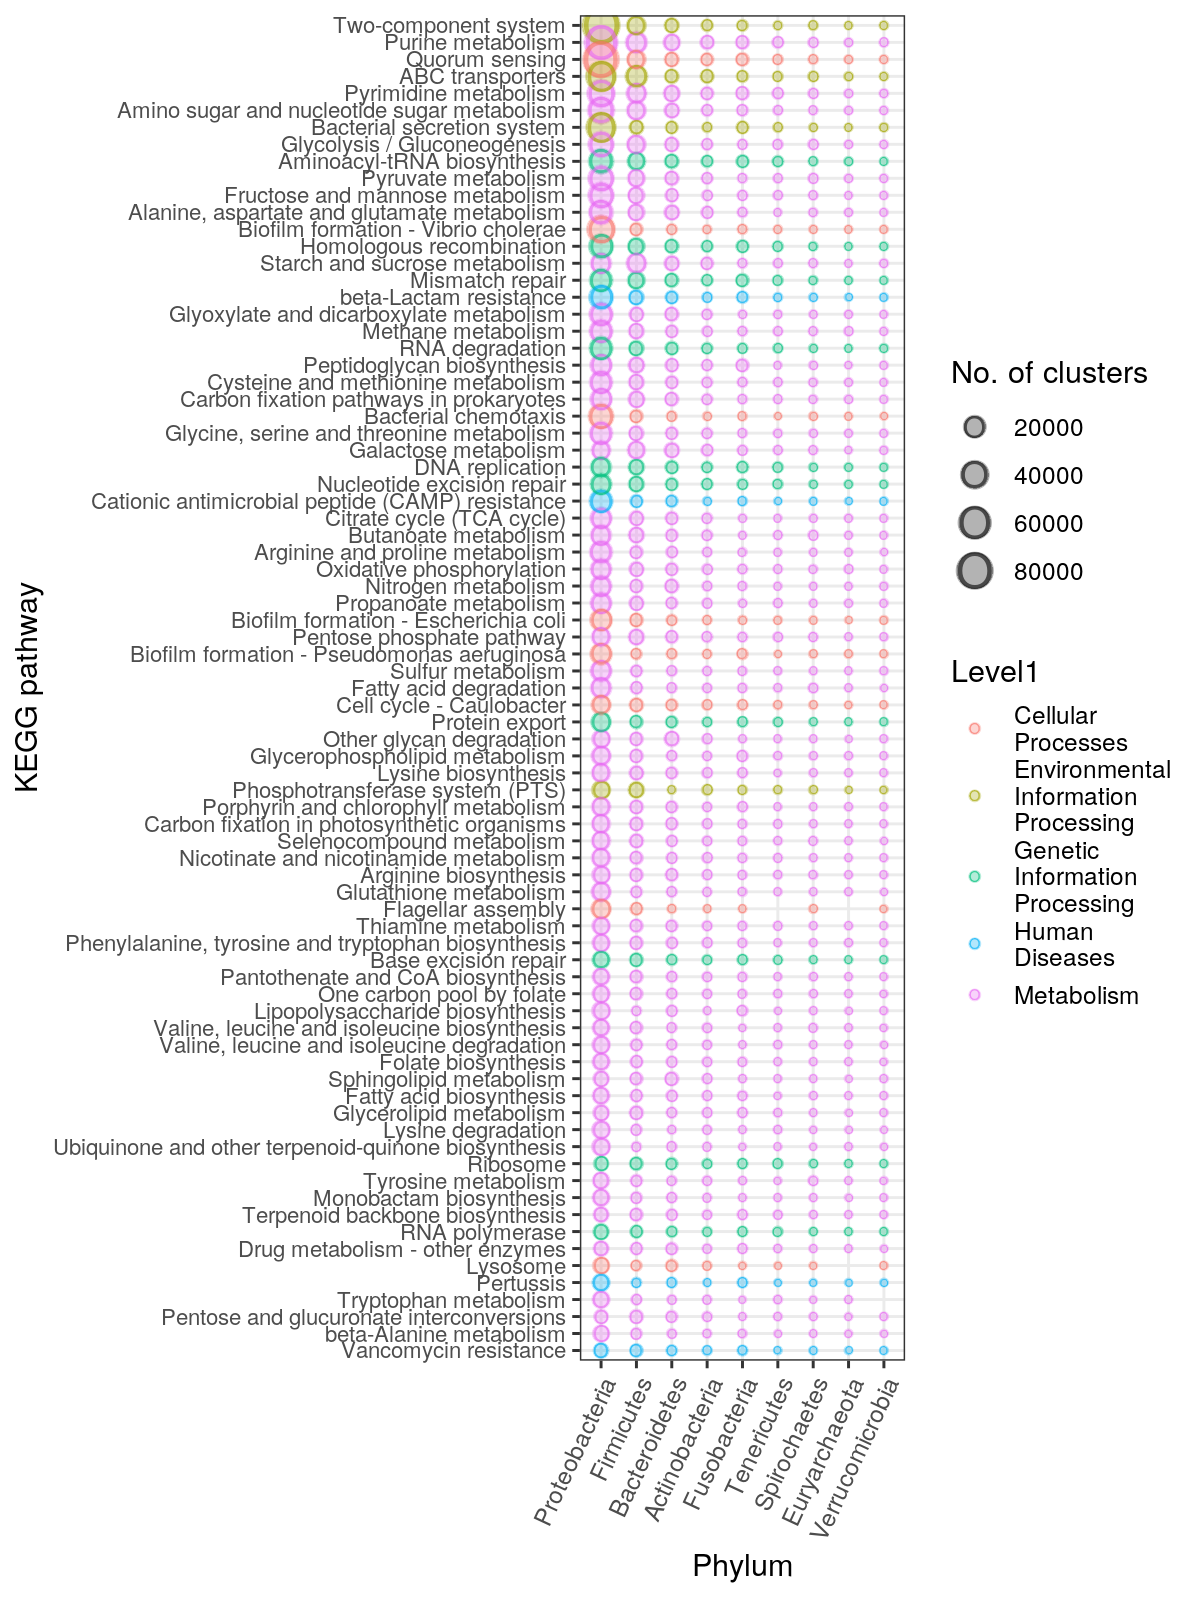

In [59]:
# plotting
p = KEGG_Pathway_s %>%
    dt_filter(n_clust_phylum >= 5000,
              n_clust_pathway >= 10000) %>%
    dt_mutate(Level1 = stringr::str_wrap(Level1, 12),
              Phylum = reorder(Phylum, -n_clust_phylum),
              KEGG_Pathway_Name = reorder(KEGG_Pathway_Name, n_clust_pathway)) %>%
    ggplot(aes(Phylum, KEGG_Pathway_Name, size=n, color=Level1)) +
    geom_point(alpha=0.3) +
    geom_point(shape='O', alpha=0.6) +
    scale_size_continuous('No. of clusters') +
    labs(x='Phylum', y='KEGG pathway') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1),
        axis.text.y = element_text(size=8)
    ) 

p.dims(6,8)
plot(p)

##### Archaea

In [60]:
# summarizing
KEGG_Pathway_s = KEGG_Pathway %>%
    dt_filter(Domain == 'Archaea',
              !is.na(KEGG_Pathway_Name),
              KEGG_Pathway_Name != '') %>%
    dt_summarize(n = n_distinct(seqid), 
                 by=list(Level1, Level2, KEGG_Pathway_Name, 
                         Domain, Phylum)) %>%
    dt_filter(Level2 != 'Global and overview maps') %>%
    dt_mutate(n_clust_phylum = sum(n), 
              by=list(Domain, Phylum))  %>%
    dt_mutate(n_clust_pathway = sum(n),
              by=list(KEGG_Pathway_Name))

KEGG_Pathway_s

Level1                         Level2                          
1   Metabolism                     Energy metabolism               
2   Genetic Information Processing Translation                     
⋮   ⋮                              ⋮                               
424 Genetic Information Processing Folding, sorting and degradation
425 Cellular Processes             Cell growth and death           
    KEGG_Pathway_Name                           Domain 
1   Oxidative phosphorylation                   Archaea
2   Aminoacyl-tRNA biosynthesis                 Archaea
⋮   ⋮                                           ⋮      
424 Protein processing in endoplasmic reticulum Archaea
425 Necroptosis                                 Archaea
    Phylum                    n   n_clust_phylum n_clust_pathway
1   Euryarchaeota             271 5821           334            
2   Euryarchaeota             173 5821           188            
⋮   ⋮                         ⋮   ⋮              ⋮              
424 Candidatus Bathyarchaeota 1   345            37             
425 Candidatus Bathyarchaeota 1   345            11

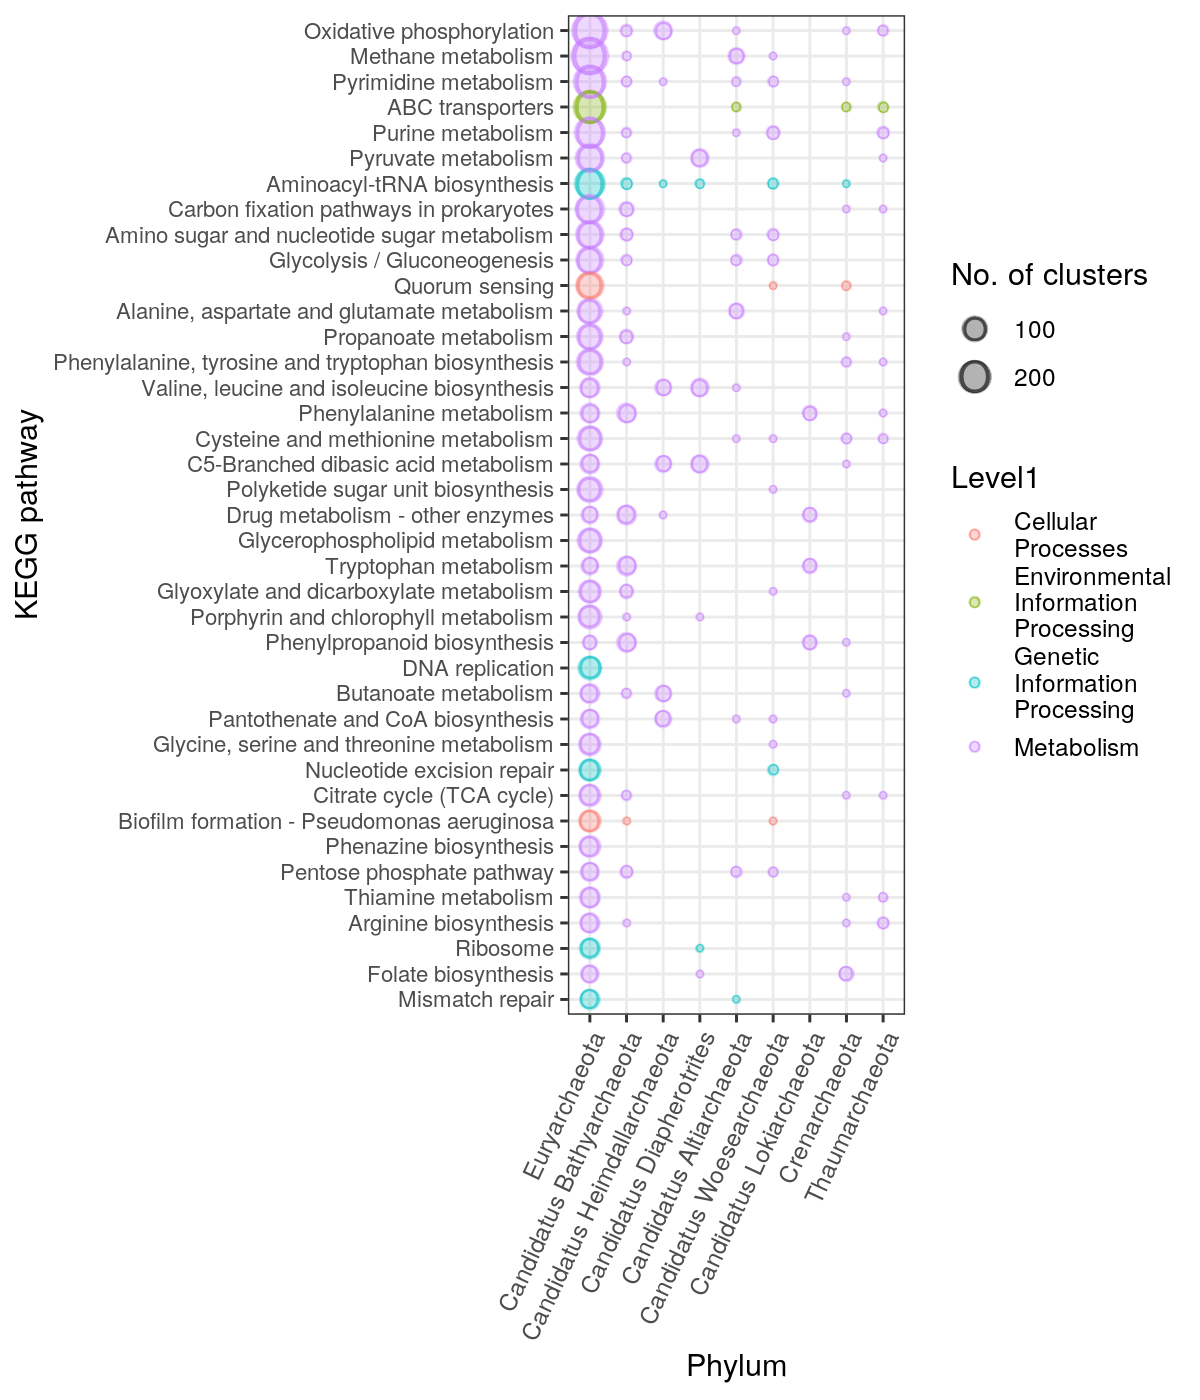

In [61]:
# plotting
p = KEGG_Pathway_s %>%
    dt_filter(n_clust_phylum >= 50,
              n_clust_pathway >= 50) %>%
    dt_mutate(Level1 = stringr::str_wrap(Level1, 12),
              Phylum = reorder(Phylum, -n_clust_phylum),
              KEGG_Pathway_Name = reorder(KEGG_Pathway_Name, n_clust_pathway)) %>%
    ggplot(aes(Phylum, KEGG_Pathway_Name, size=n, color=Level1)) +
    geom_point(alpha=0.3) +
    geom_point(shape='O', alpha=0.6) +
    scale_size_continuous('No. of clusters') +
    labs(x='Phylum', y='KEGG pathway') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1),
        axis.text.y = element_text(size=8)
    ) 

p.dims(6,7)
plot(p)

### CAZy

In [62]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 500000', file=F, header=FALSE) 
CAZy_annot = fread(cmd=cmd, sep='\t') 
colnames(CAZy_annot) = cols
## separate
max_feats = CAZy_annot %>%
    dt_distinct(CAZy) %>% 
    dt_mutate(n_feats = stringr::str_count(CAZy, ',')) %>%
    dt_pull(n_feats) %>% max
new_cols = gsub('^', 'X', 1:(max_feats + 1))
CAZy_annot = CAZy_annot %>%
    dt_select(query_name, CAZy) %>%
    dt_separate(CAZy, into=new_cols, sep=',') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='CAZy') %>%
    dt_filter(!is.na(CAZy)) %>%
    dt_select(-X) %>%
    dt_rename(seqid = query_name) %>%
    dt_mutate(CAZy_module = gsub('[0-9]+$', '', CAZy),
              CAZy = gsub('^([^0-9]+)([0-9])$', '\\10\\2', CAZy),
              CAZy = gsub('^([^0-9]+)([0-9][0-9])$', '\\10\\2', CAZy))
CAZy_annot 

seqid                            CAZy  CAZy_module
1      96efcedb381249668f99b3b58e619fac GH013 GH         
2      6548fb2615a44a5eb90c3cd0eb18a3ef GT004 GT         
⋮      ⋮                                ⋮     ⋮          
121036 4e63c868cdbc46118e66d3a6f7a0f479 PL008 PL         
121037 d2e507606ee64a9e9bb990007a3f5d47 PL008 PL

In [63]:
# joining with taxonomy
CAZy_annot = CAZy_annot %>%
    dt_inner_join(tax, by=c('seqid')) %>%
    dt_filter(!is.na(CAZy))
CAZy_annot

seqid                            CAZy  CAZy_module Domain   Kingdom
1      1d74294ebc1044ae95dba573bdd94a02 GT002 GT          Bacteria unknown
2      700219a575924bd6b5f5bb6d0f6250de GH020 GH          Bacteria unknown
⋮      ⋮                                ⋮     ⋮           ⋮        ⋮      
109526 2d6d4fa1c49f48a680c833d93460d1d2 GT004 GT          Bacteria unknown
109527 61d322bdf5ca45fe8c1c26547f88cbc0 GT035 GT          Bacteria unknown
       Phylum         Class               Order             Family            
1      Proteobacteria Gammaproteobacteria Enterobacterales  Hafniaceae        
2      Proteobacteria Gammaproteobacteria Vibrionales       Vibrionaceae      
⋮      ⋮              ⋮                   ⋮                 ⋮                 
109526 Actinobacteria Actinobacteria      Bifidobacteriales Bifidobacteriaceae
109527 Firmicutes     Clostridia          Clostridiales     Lachnospiraceae   
       Genus           Species                          
1      Hafnia          Hafnia alvei                     
2      Vibrio          Vibrio lentus                    
⋮      ⋮               ⋮                                
109526 Bifidobacterium Bifidobacterium indicum          
109527 unknown         Lachnospiraceae bacterium YSD2013

In [64]:
CAZy_annot %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length %>%
    cat('Number of CAZy gene clusters:', ., '\n')

Number of CAZy gene clusters: 87573 


In [65]:
# summarizing
CAZy_annot_s = CAZy_annot %>%
    dt_summarize(n = n_distinct(seqid), 
                 by=list(CAZy_module, CAZy)) %>%
    dt_mutate(n_clust_fam = sum(n),
              by=list(CAZy))

CAZy_annot_s

CAZy_module CAZy  n    n_clust_fam
1   GT          GT002 6984 6984       
2   GH          GH020 4744 4744       
⋮   ⋮           ⋮     ⋮    ⋮          
102 GH          GH116 2    2          
103 GT          GT080 1    1

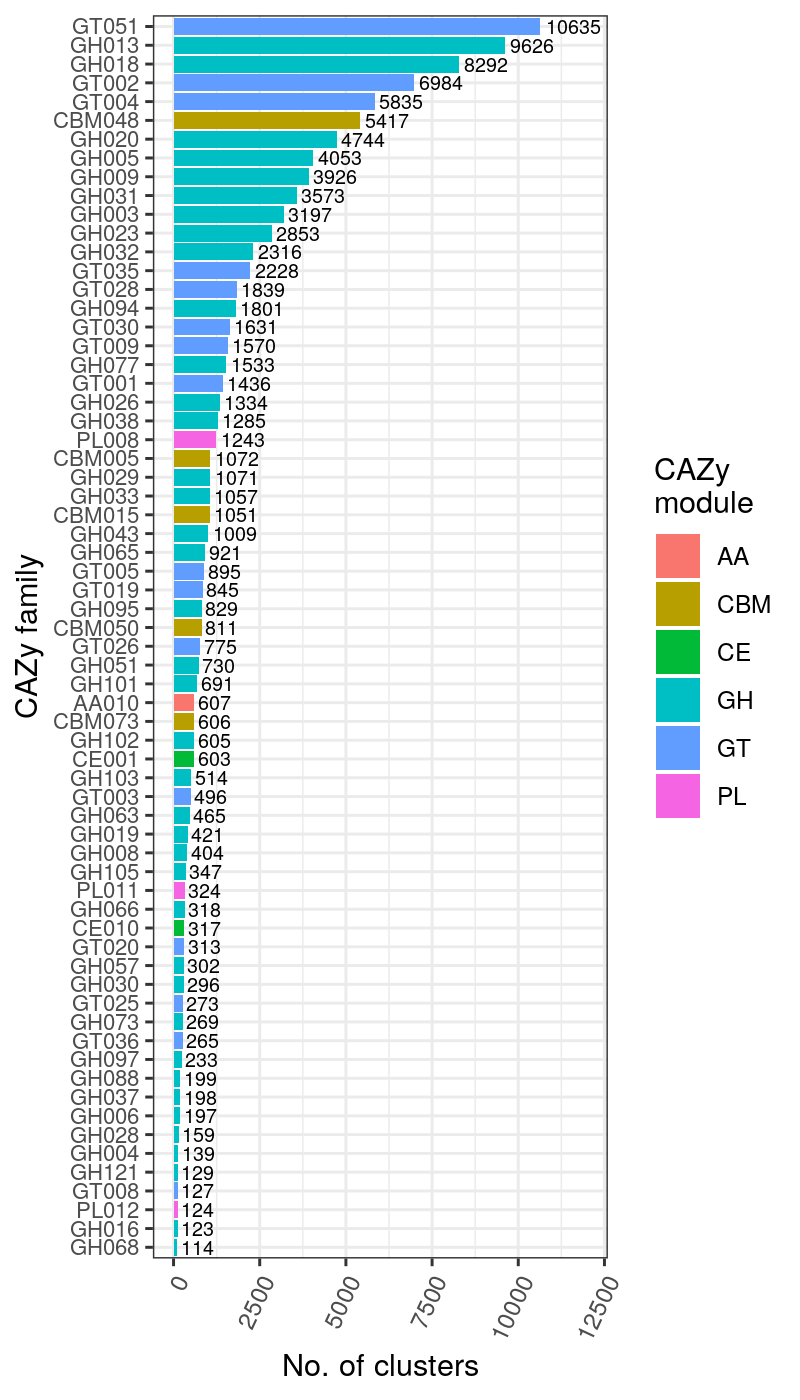

In [66]:
# plotting
p = CAZy_annot_s %>%
    dt_filter(n_clust_fam >= 100) %>%
    dt_mutate(CAZy = reorder(CAZy, n_clust_fam)) %>%
    ggplot(aes(CAZy, n, fill=CAZy_module)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=n), hjust=-0.1, size=2.5) +
    scale_fill_discrete('CAZy\nmodule') +
    scale_y_continuous(limits=c(0, 12000)) +
    labs(x='CAZy family', y='No. of clusters') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1),
        axis.text.y = element_text(size=8)
    ) +
    coord_flip()

p.dims(4,7)
plot(p)

#### By taxonomy

In [67]:
# summarizing
CAZy_annot_s = CAZy_annot %>%
    dt_summarize(n = n_distinct(seqid), 
                 by=list(CAZy_module, CAZy, 
                         Domain, Phylum)) %>%
    dt_mutate(n_clust_phylum = sum(n), 
              by=list(Domain, Phylum))  %>%
    dt_mutate(n_clust_fam = sum(n),
              by=list(CAZy))

CAZy_annot_s

CAZy_module CAZy  Domain   Phylum                    n    n_clust_phylum
1   GT          GT002 Bacteria Proteobacteria            4222 59834         
2   GH          GH020 Bacteria Proteobacteria            3149 59834         
⋮   ⋮           ⋮     ⋮        ⋮                         ⋮    ⋮             
756 GT          GT002 Bacteria Candidatus Tectomicrobia  1    2             
757 GT          GT066 Archaea  Candidatus Bathyarchaeota 1    3             
    n_clust_fam
1   6984       
2   4744       
⋮   ⋮          
756 6984       
757   16

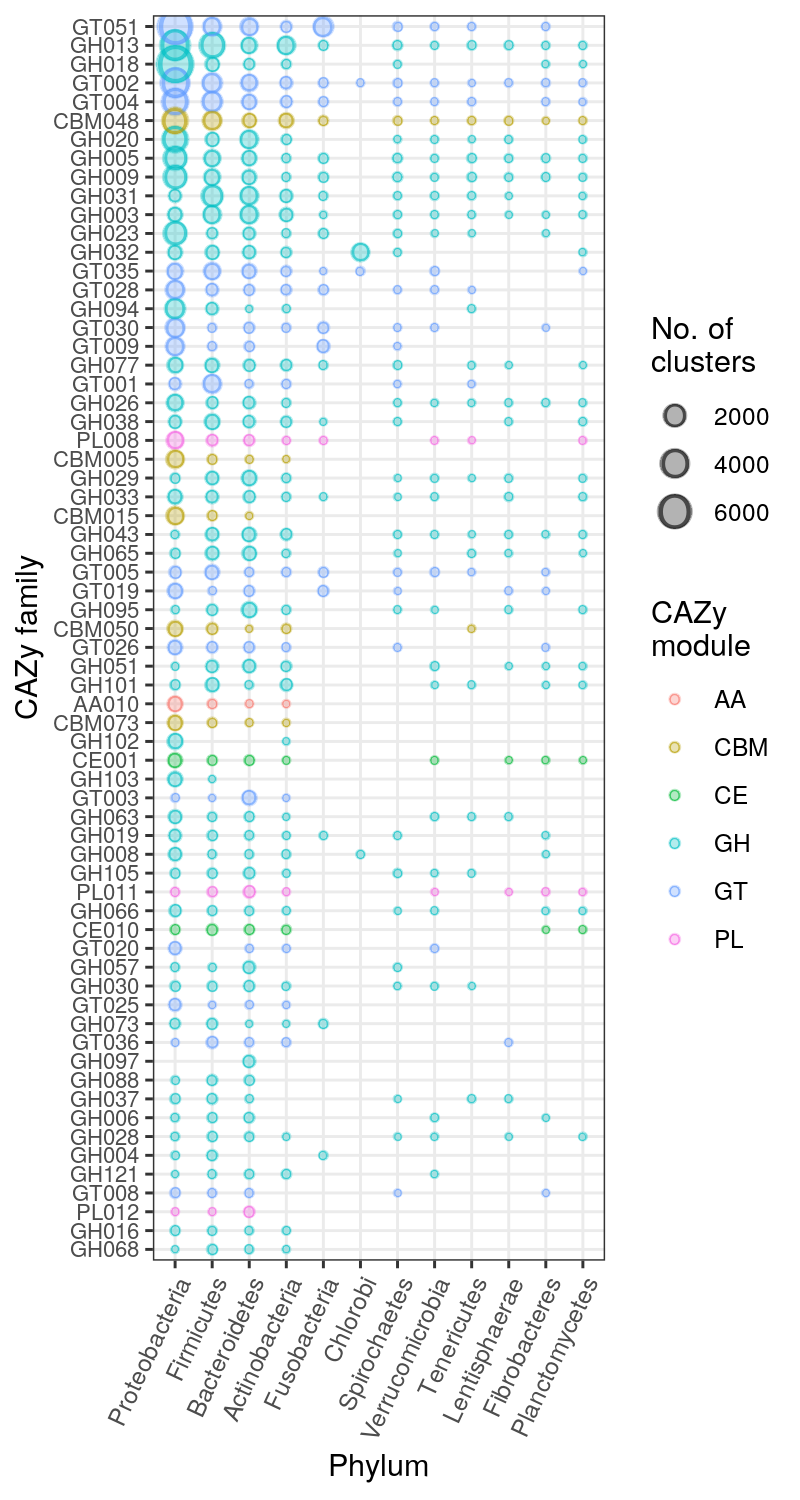

In [68]:
# plotting
p = CAZy_annot_s %>%
    dt_filter(n_clust_phylum >= 100,
              n_clust_fam >= 100) %>%
    dt_mutate(Phylum = reorder(Phylum, -n_clust_phylum),
              CAZy = reorder(CAZy, n_clust_fam)) %>%
    ggplot(aes(Phylum, CAZy, size=n, color=CAZy_module)) +
    geom_point(alpha=0.3) +
    geom_point(shape='O', alpha=0.6) +
    scale_size_continuous('No. of\nclusters') +
    scale_color_discrete('CAZy\nmodule') +
    labs(x='Phylum', y='CAZy family') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1),
        axis.text.y = element_text(size=8)
    ) 

p.dims(4,7.5)
plot(p)

## Humann2 db genes

In [342]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    dt_separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    dt_separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    dt_separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    dt_mutate(Genus = gsub('^g__', '', Genus))

hm2 

original_name                    UniRefID               Gene_length
1      5f71676fe7ad44a58e93afbd4d57a71f UniRef50_UPI00035D44C3 563        
2      4f509c5351da4782bcba565a798e69da UniRef50_U4KE51        76         
⋮      ⋮                                ⋮                      ⋮          
722794 84cea246bd2f4d63b8a1ba61f6156025 UniRef50_K2AHJ3        216        
722795 d331e815a0ff49b8b701e815ab9aea95 UniRef50_R5QRZ5        232        
       Genus              TaxID 
1      Vibrionaceae       858640
2      Chromobacteriaceae 57480 
⋮      ⋮                  ⋮     
722794 unclassified       NA    
722795 Ruminococcaceae    411483

In [343]:
# checking overlap
overlap(hm2 %>% dt_distinct(original_name) %>% dt_pull(original_name),
        tax %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 609984 
setdiff(x,y): 112811 
setdiff(y,x): 2475770 
union(x,y): 3198565 


In [344]:
# adding taxonomy
hm2 = hm2 %>%
    dt_rename('seqid' = original_name) %>%
    dt_left_join(tax , by=c('seqid'))

hm2

seqid                            UniRefID               Gene_length
1      5f71676fe7ad44a58e93afbd4d57a71f UniRef50_UPI00035D44C3 563        
2      4f509c5351da4782bcba565a798e69da UniRef50_U4KE51        76         
⋮      ⋮                                ⋮                      ⋮          
722794 84cea246bd2f4d63b8a1ba61f6156025 UniRef50_K2AHJ3        216        
722795 d331e815a0ff49b8b701e815ab9aea95 UniRef50_R5QRZ5        232        
       Genus            TaxID  Domain   Kingdom Phylum        
1      Photobacterium   858640 Bacteria unknown Proteobacteria
2      Microvirgula     57480  Bacteria unknown Proteobacteria
⋮      ⋮                ⋮      ⋮        ⋮       ⋮             
722794 NA               NA     NA       NA      NA            
722795 Faecalibacterium 411483 Bacteria unknown Firmicutes    
       Class               Order         Family            
1      Gammaproteobacteria Vibrionales   Vibrionaceae      
2      Betaproteobacteria  Neisseriales  Chromobacteriaceae
⋮      ⋮                   ⋮             ⋮                 
722794 NA                  NA            NA                
722795 Clostridia          Clostridiales Ruminococcaceae   
       Species                       
1      Photobacterium jeanii         
2      Microvirgula aerodenitrificans
⋮      ⋮                             
722794 NA                            
722795 Faecalibacterium prausnitzii

### Summary

In [345]:
# number of unique UniRef IDs
hm2 %>% dt_distinct(UniRefID) %>% dt_pull(UniRefID) %>% length %>%
    cat('Number of IDs:', ., '\n')

Number of IDs: 208541 


In [346]:
# duplicate UniRef IDs
df.dims(20)
hm2 %>%
    dt_count(UniRefID) %>%
    dt_arrange(-N) %>%
    dt_slice_head(n=20)
df.dims()

UniRefID               N   
1  UniRef50_G7P3W5        4785
2  UniRef50_G7PZX1        3996
3  UniRef50_G7P766        2460
4  UniRef50_L7MAZ2        2067
5  UniRef50_Q6LJS0        1551
6  UniRef50_V3TJE8         827
7  UniRef50_L7MCZ7         794
8  UniRef50_A8H7S7         731
9  UniRef50_W5NNH5         721
10 UniRef50_G7PJK4         699
11 UniRef50_A9KVH4         678
12 UniRef50_UPI0001A44C3B  605
13 UniRef50_M4AZB4         591
14 UniRef50_I3KZ22         511
15 UniRef50_Q9PH93         507
16 UniRef50_L7LYQ0         431
17 UniRef50_W4MGS4         418
18 UniRef50_R7VDK7         413
19 UniRef50_Q8EGA8         410
20 UniRef50_A8NF15         386

#### By taxonomy

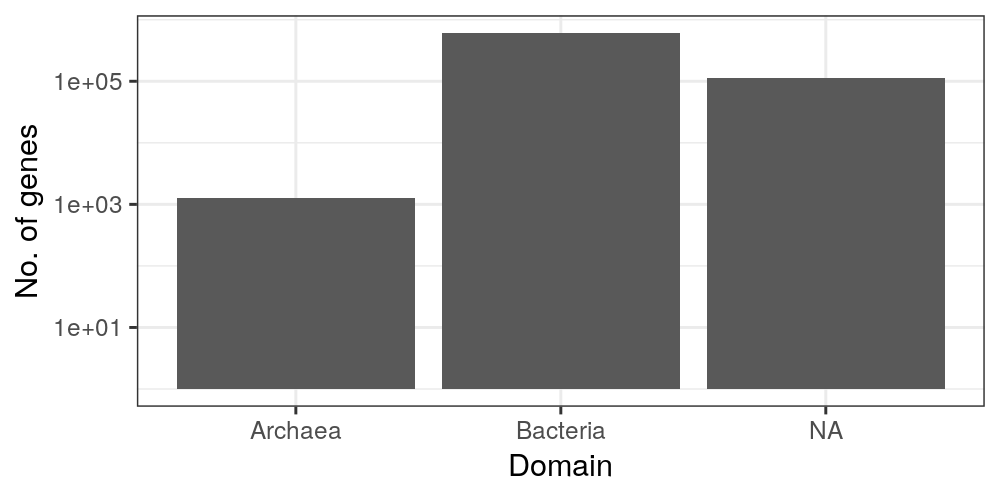

In [347]:
# number of UniRefIDs
hm2_s = hm2 %>%
    dt_summarize(n = n_distinct(seqid), by=list(Domain))

p = hm2_s %>%
    dt_filter(n >= 1000) %>%
    dt_mutate(Domain = Domain %>% reorder(n)) %>%
    ggplot(aes(Domain, n)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y='No. of genes') +
    theme_bw() 

p.dims(5,2.5)
plot(p)

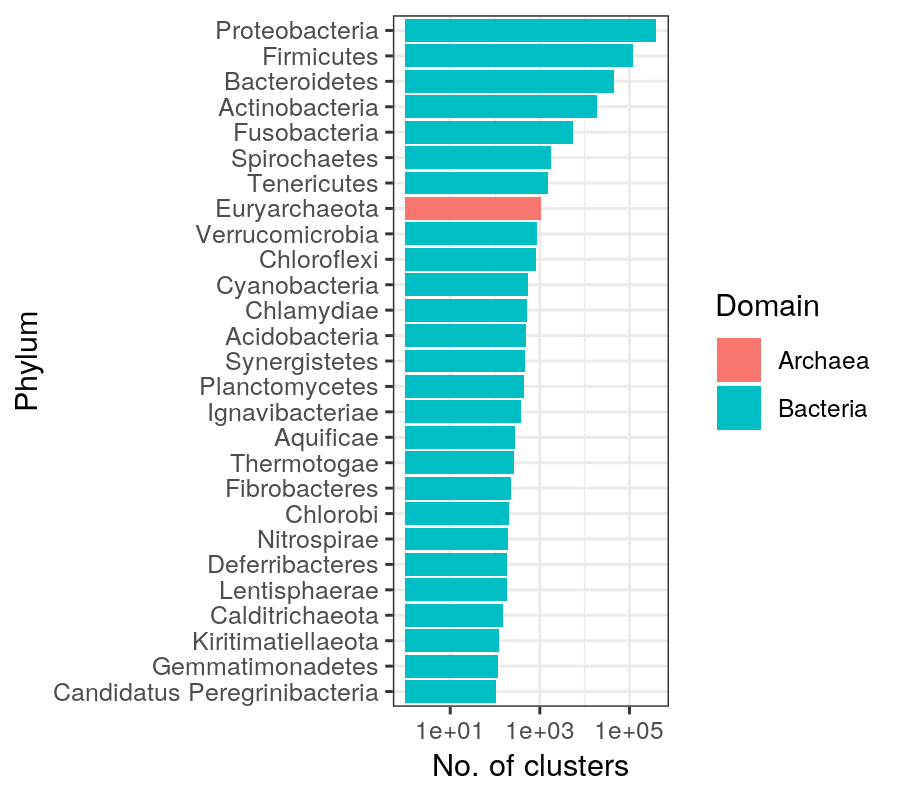

In [354]:
# number of UniRefIDs
hm2_s = hm2 %>%
    dt_summarize(n = n_distinct(seqid), by=list(Domain, Phylum)) 

p = hm2_s %>%
    dt_filter(n >= 100,
              !is.na(Domain),
              Domain != 'unknown',
              !Phylum %in% c('unknown', 'uc_Bacteria')) %>%
    dt_mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of clusters') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9)
    )
    
p.dims(4.5,4)
plot(p)

# sessionInfo

In [129]:
# clearning memory
rm(tax)
rm(tax_s)
rm(COG_annot)
rm(COG_annot_s)
rm(KEGG_Pathway)
rm(KEGG_Pathway_s)
rm(CAZy_annot)
rm(CAZy_annot_s)
rm(hm2)
gc()

Warning message in rm(hm2):
“object 'hm2' not found”


used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   4573021  244.3   13701485   731.8   14229092   760.0
Vcells 377164638 2877.6 2288342327 17458.7 3573072121 27260.4

In [200]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] LeyLabRMisc_0.1.2 doParallel_1.0.15 iterators_1.0.12  foreach_1.4.7    
 [5] tidytable_0.3.2   dtplyr_1.0.0      data.table_1.12.8 ggplot2_3.2.1    
 [9] tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3       plyr_1.